# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import io
import os
from scipy import signal

In [2]:
#load dataset
#3 patients, pre and post stroke

P1_pre_training = io.loadmat('P1_pre_training.mat')
P1_post_training = io.loadmat('P1_post_training.mat')
P1_pre_test = io.loadmat('P1_pre_test.mat')
P1_post_test = io.loadmat('P1_post_test.mat')

P2_pre_training = io.loadmat('P2_pre_training.mat')
P2_post_training = io.loadmat('P2_post_training.mat')
P2_pre_test = io.loadmat('P2_pre_test.mat')
P2_post_test = io.loadmat('P2_post_test.mat')

P3_pre_training = io.loadmat('P3_pre_training.mat')
P3_post_training = io.loadmat('P3_post_training.mat')
P3_pre_test = io.loadmat('P3_pre_test.mat')
P3_post_test = io.loadmat('P3_post_test.mat')

In [3]:
#labels
label_P1_pre_training=P1_pre_training['trig']
label_P1_pre_training

array([[ 0],
       [ 0],
       [ 0],
       ...,
       [-1],
       [-1],
       [-1]], dtype=int16)

In [4]:
(unique, counts) = np.unique(P1_pre_training['trig'], return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[    -1,  79889],
       [     0, 110007],
       [     1,  81920]], dtype=int64)

In [5]:
for m in [P1_pre_training, P1_post_training, P1_pre_test, P1_post_test, 
          P2_pre_training, P2_post_training, P2_pre_test, P2_post_test, 
          P3_pre_training, P3_post_training, P3_pre_test, P3_post_test]:
    print(np.shape(m['y']))                                                  #16 channels

(271816, 16)
(197343, 16)
(204560, 16)
(194088, 16)
(223112, 16)
(216720, 16)
(199552, 16)
(233576, 16)
(205536, 16)
(206504, 16)
(248488, 16)
(218432, 16)


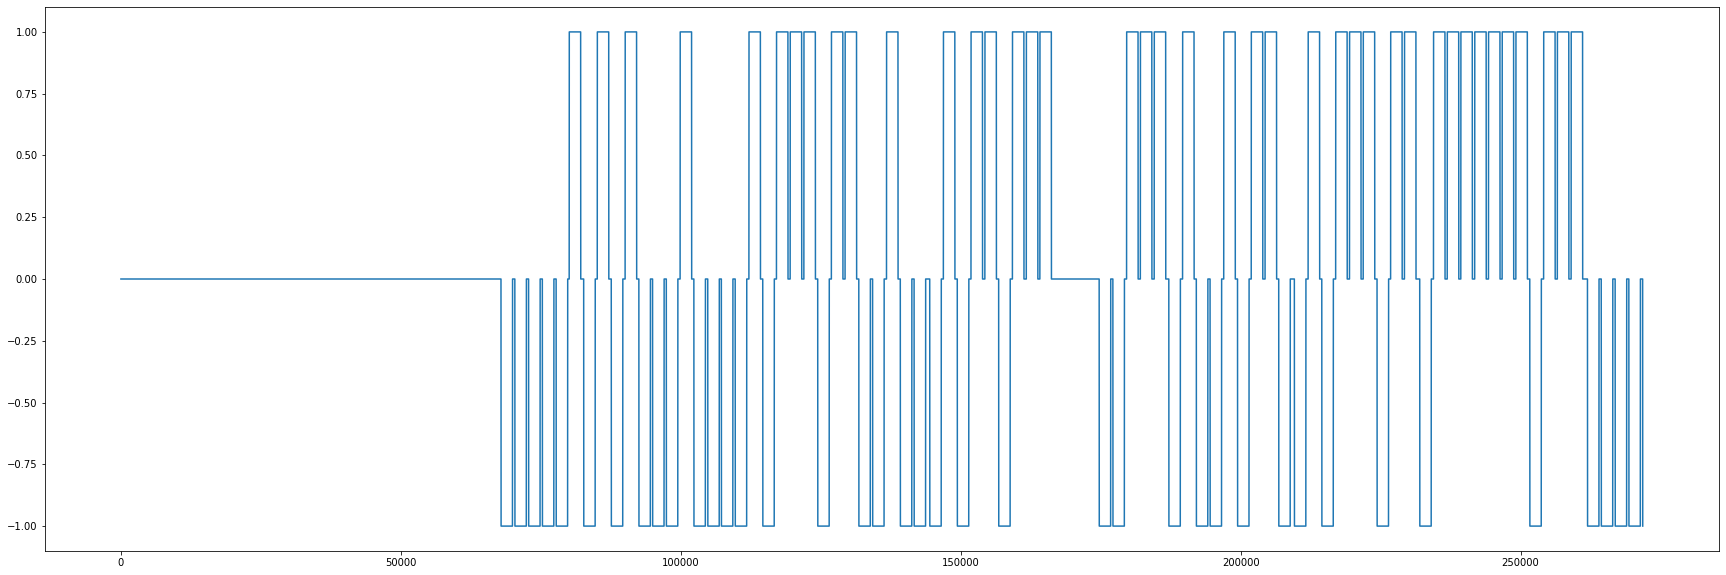

In [14]:
#P1_pre_training

t = range(271816)        

plt.figure(figsize=(30,10))
plt.plot(t,label_P1_pre_training[:,0])
plt.show()

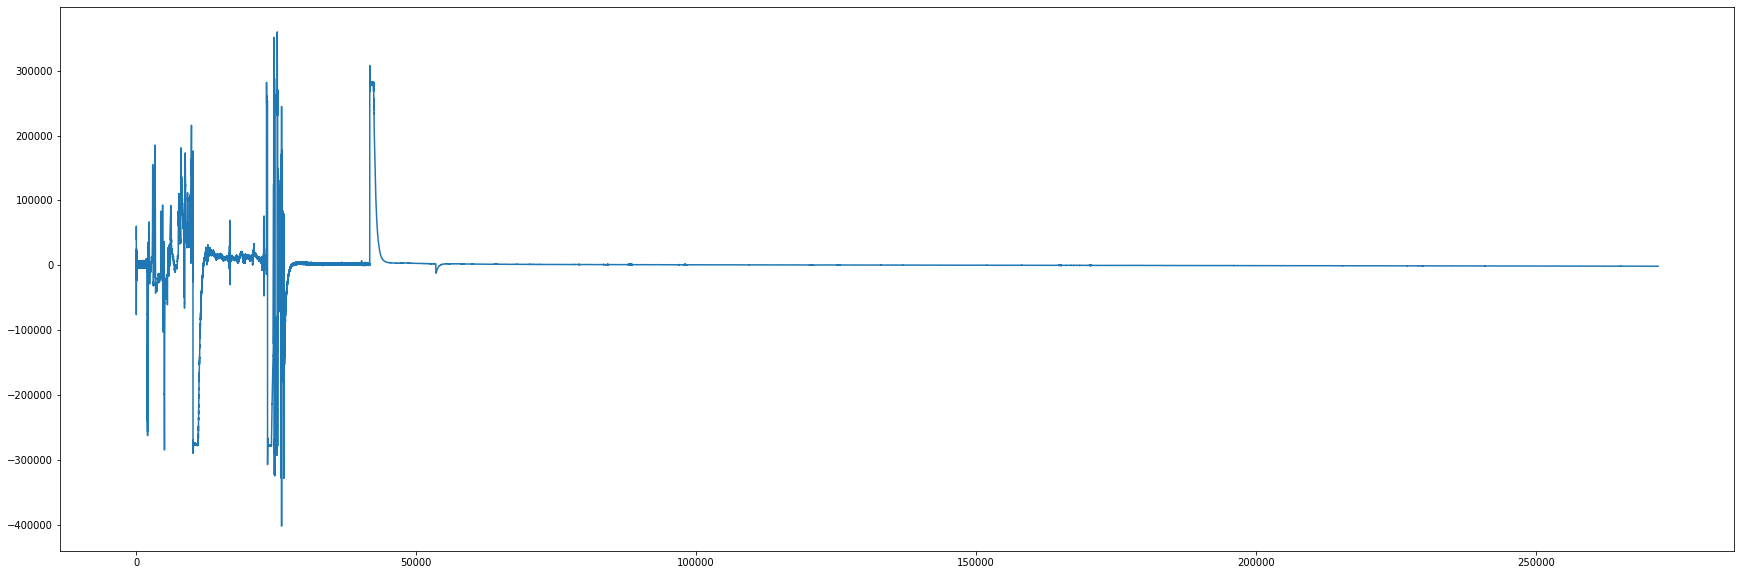

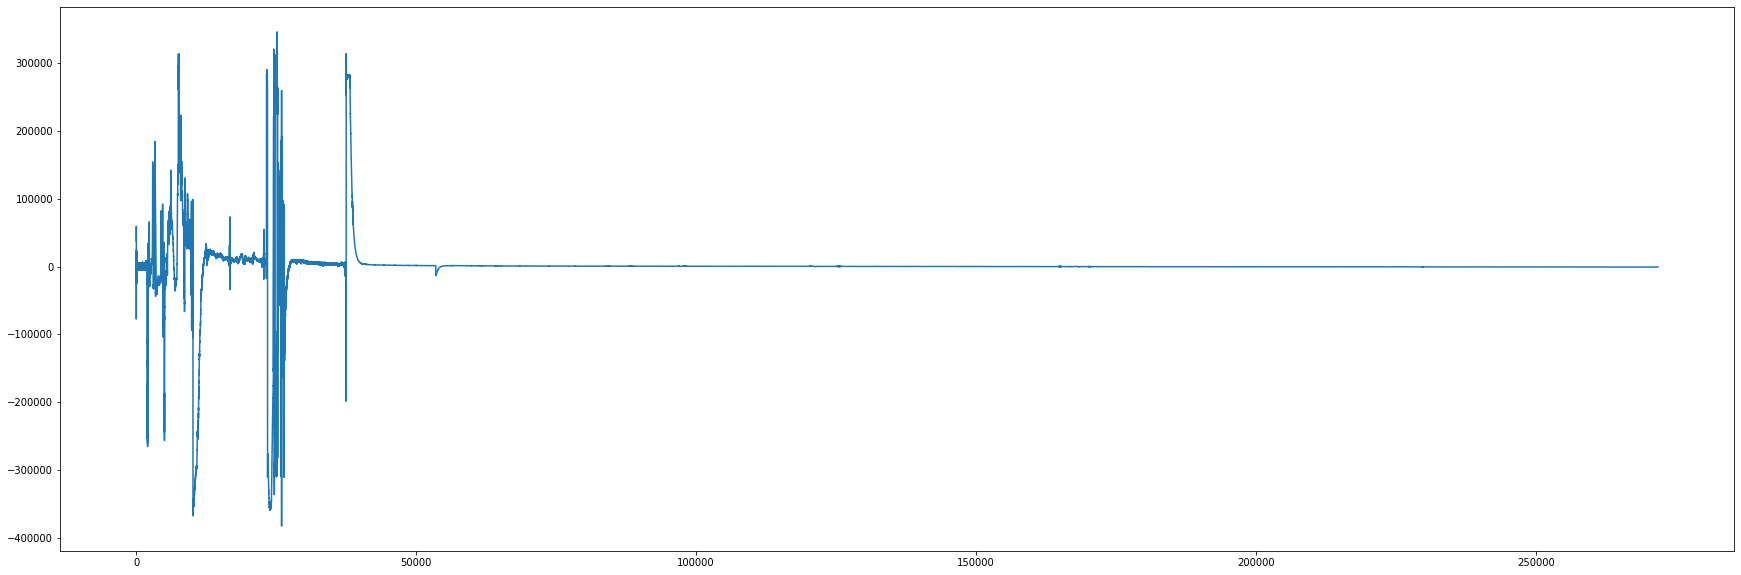

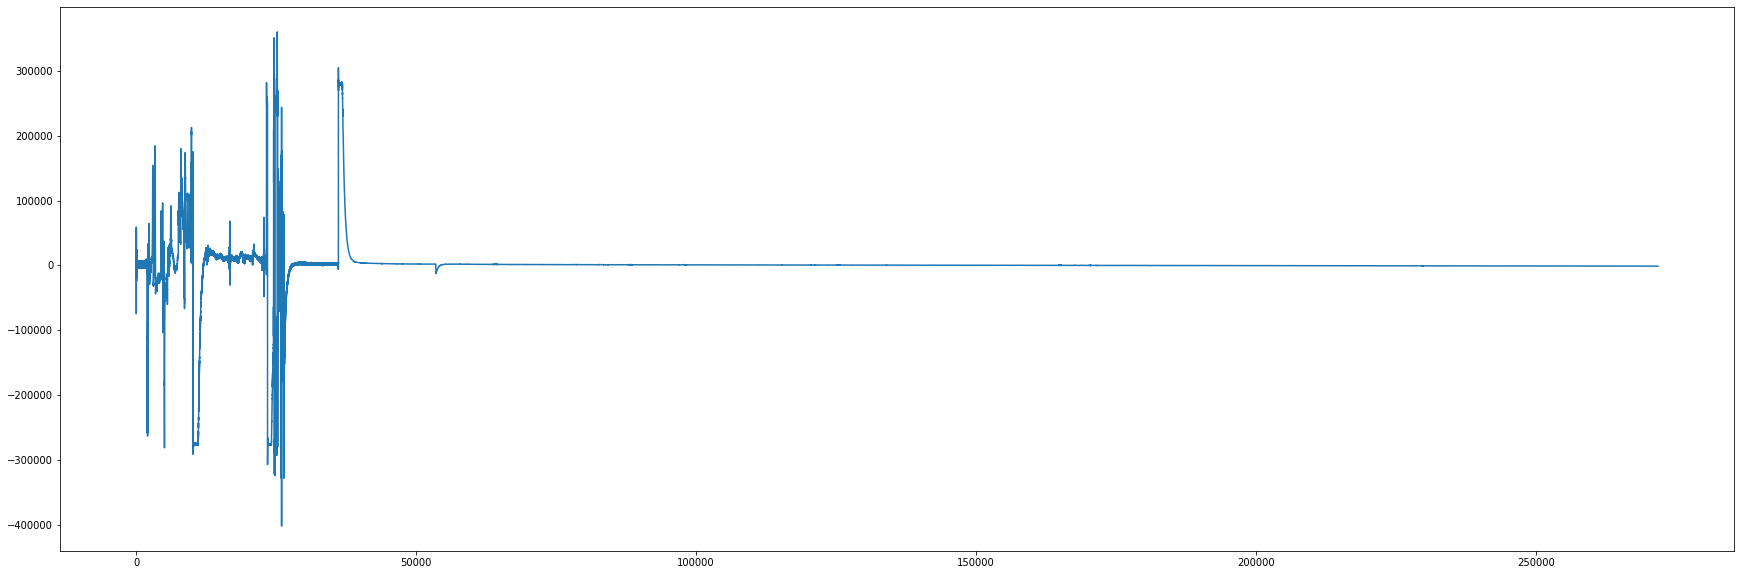

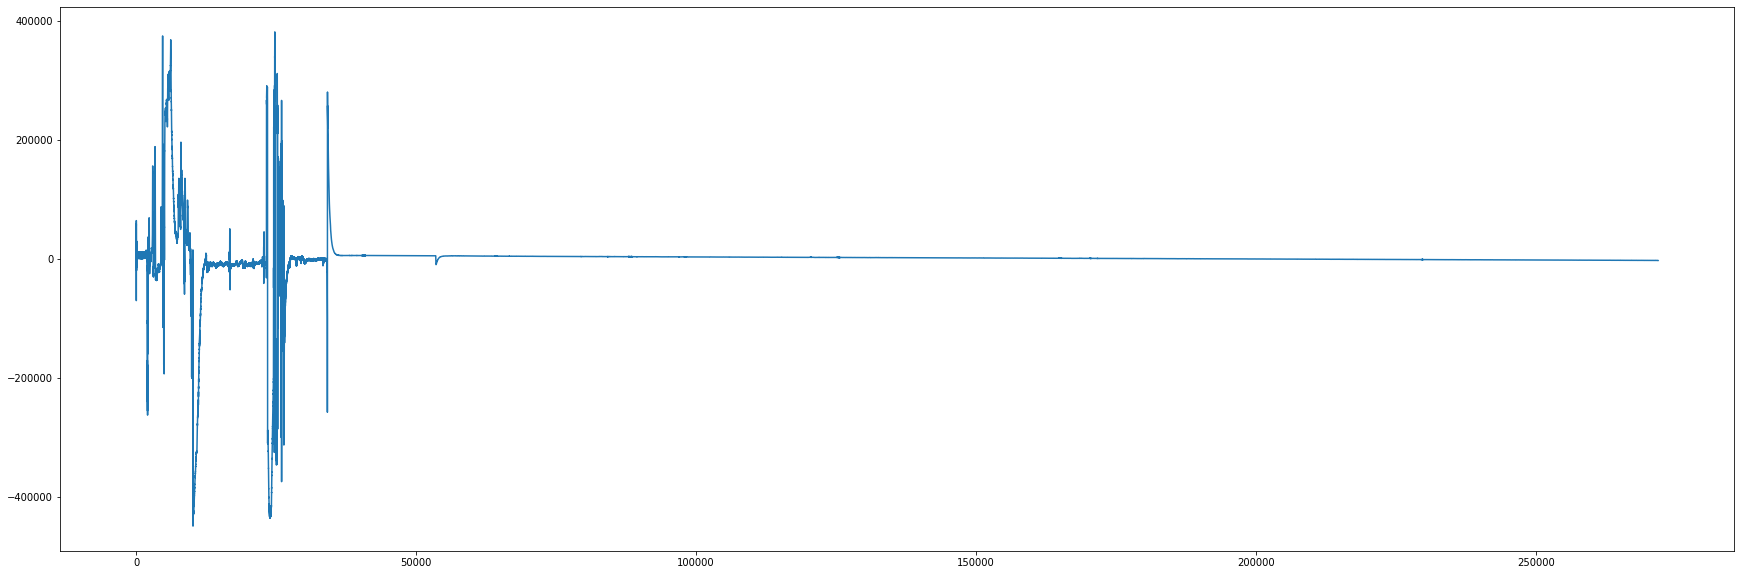

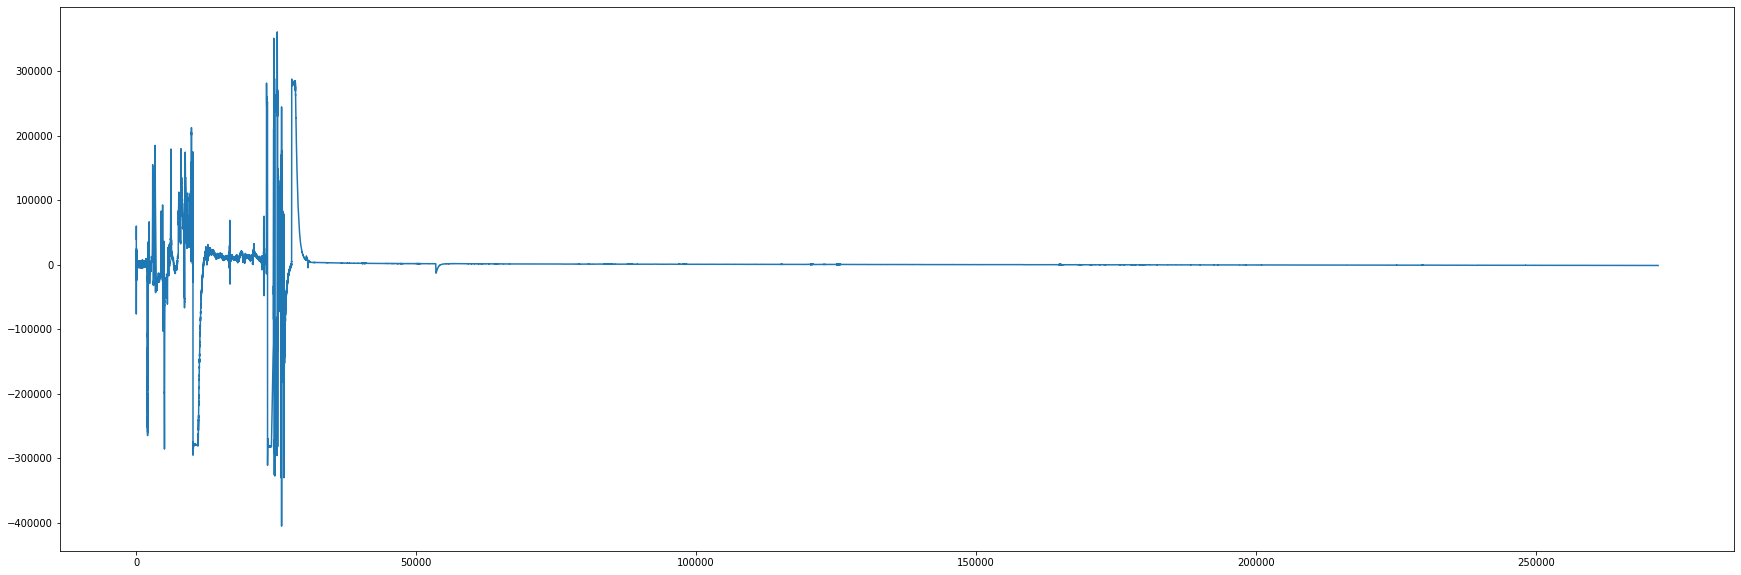

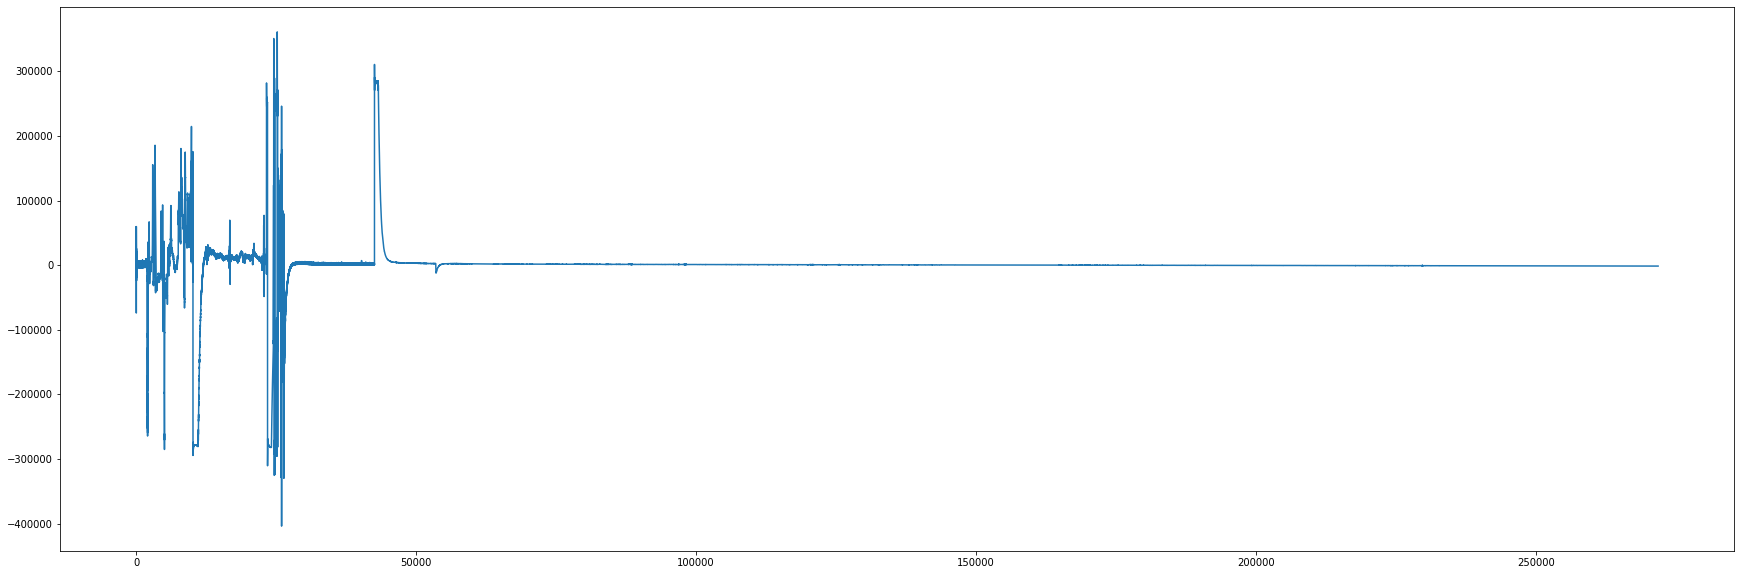

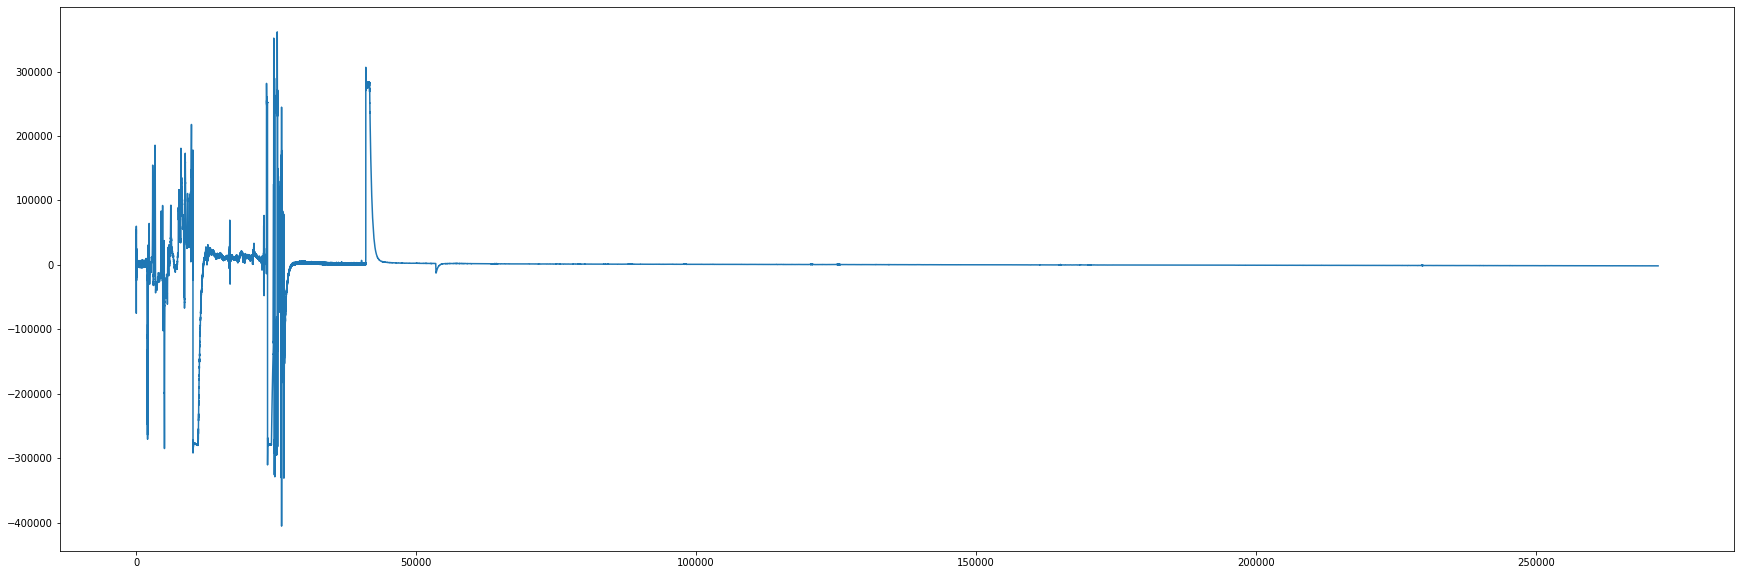

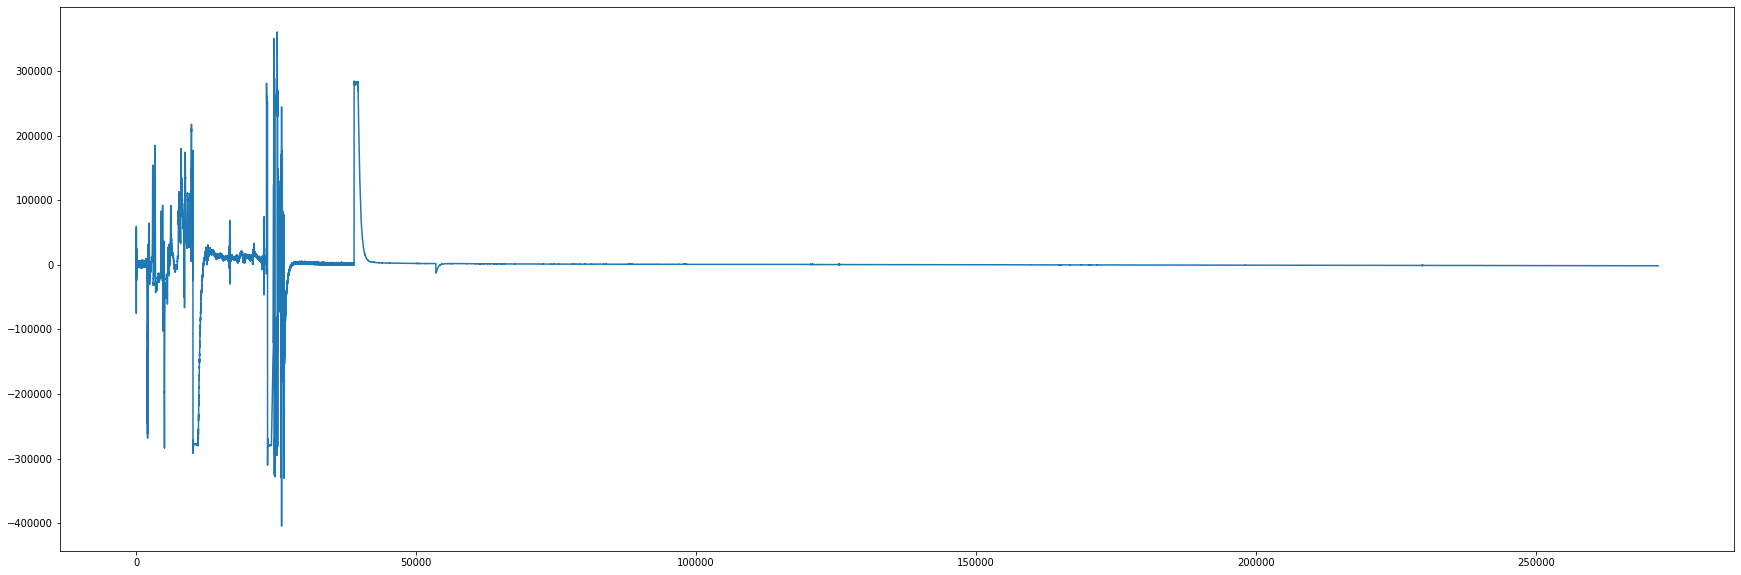

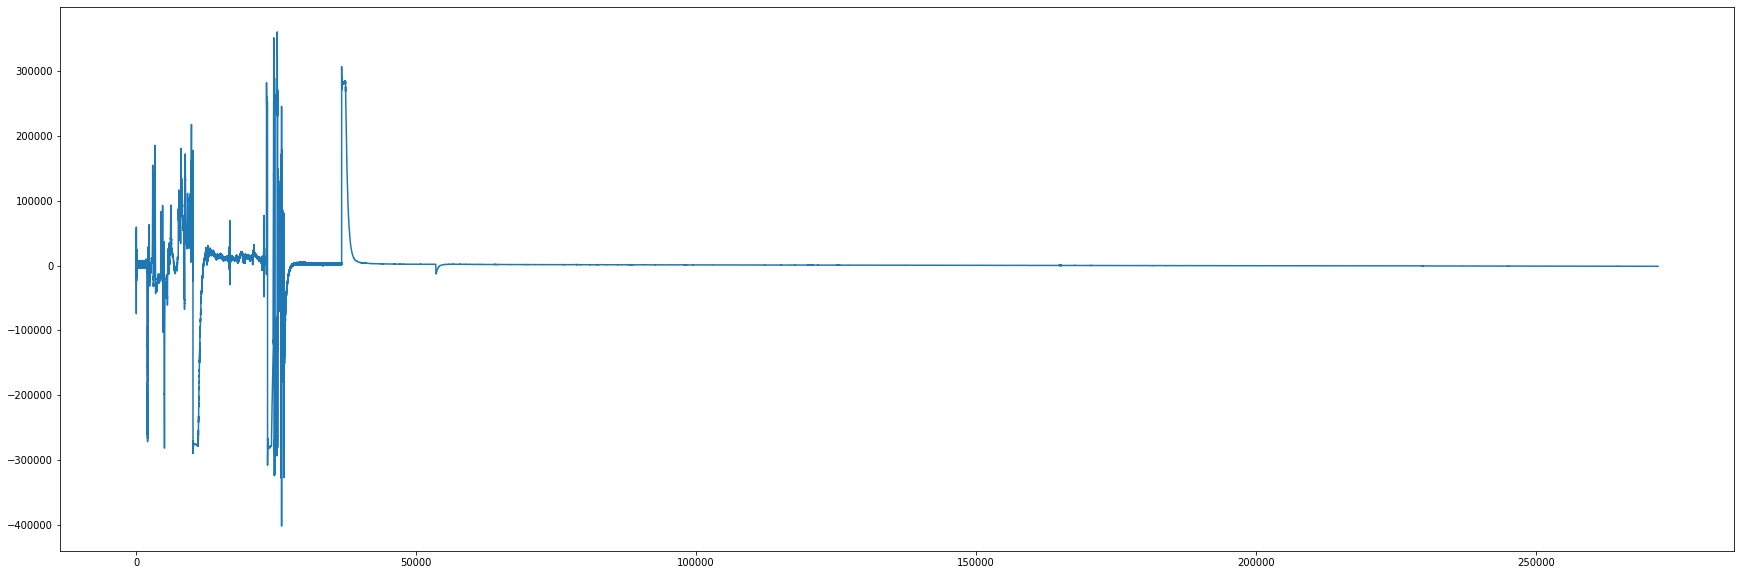

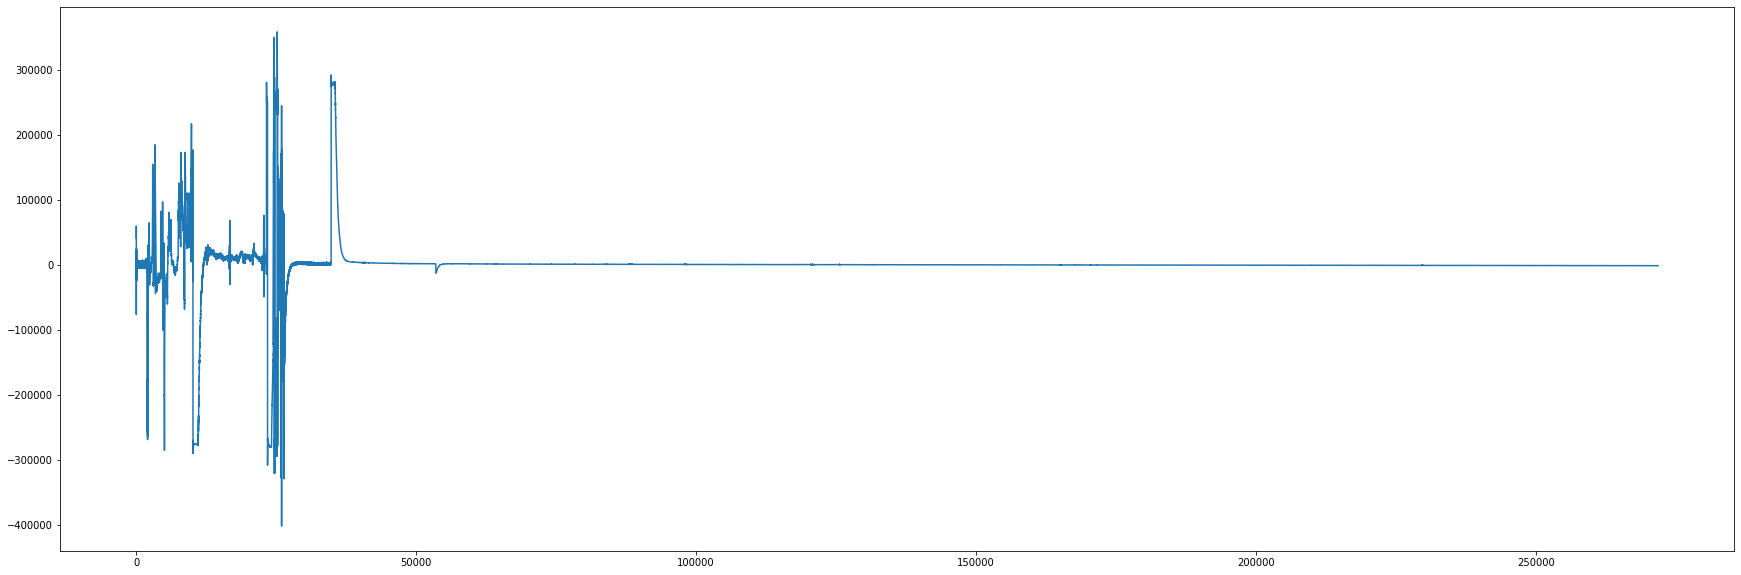

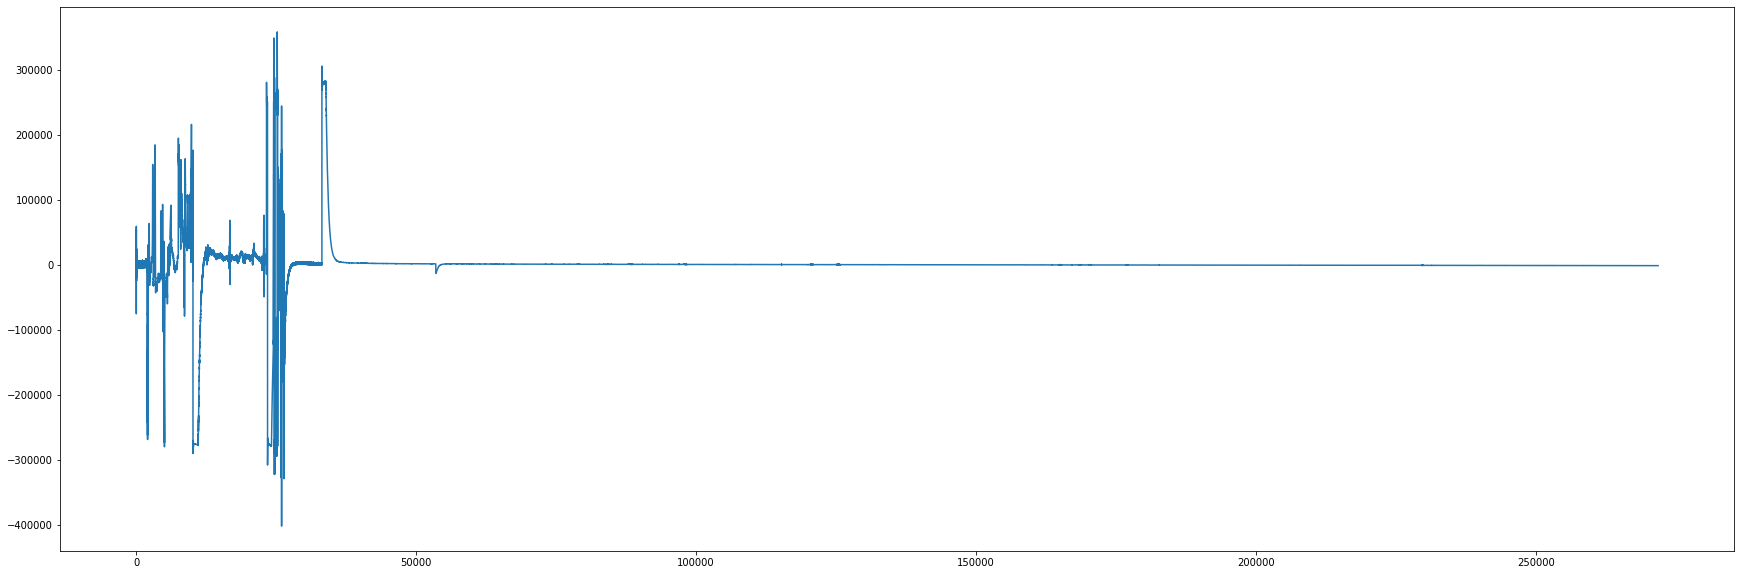

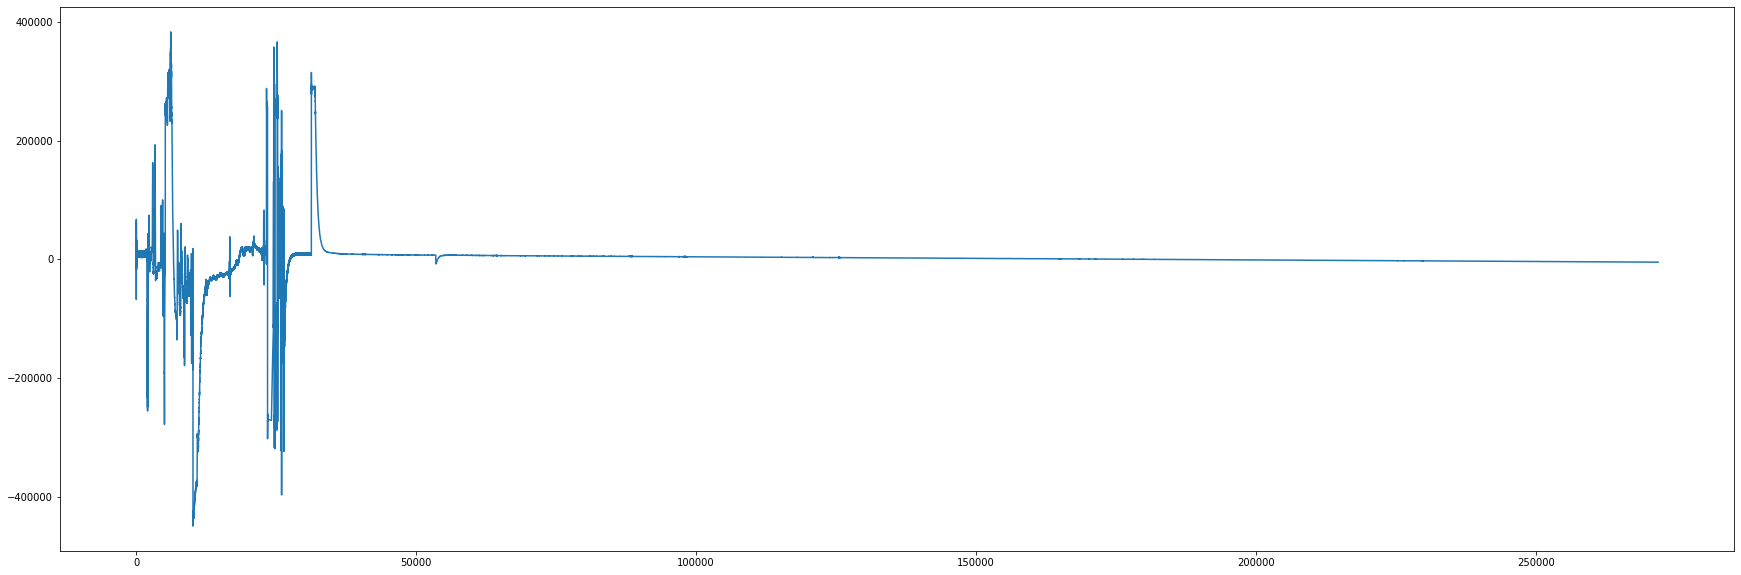

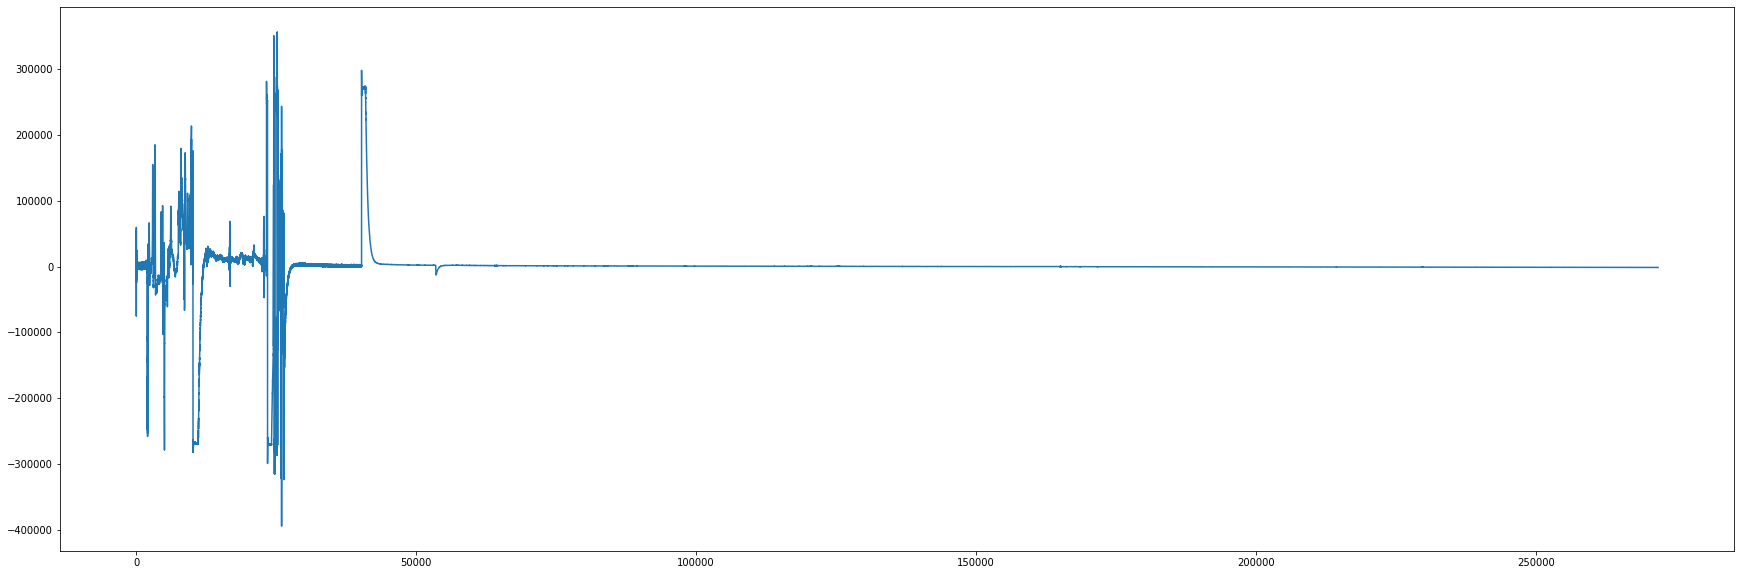

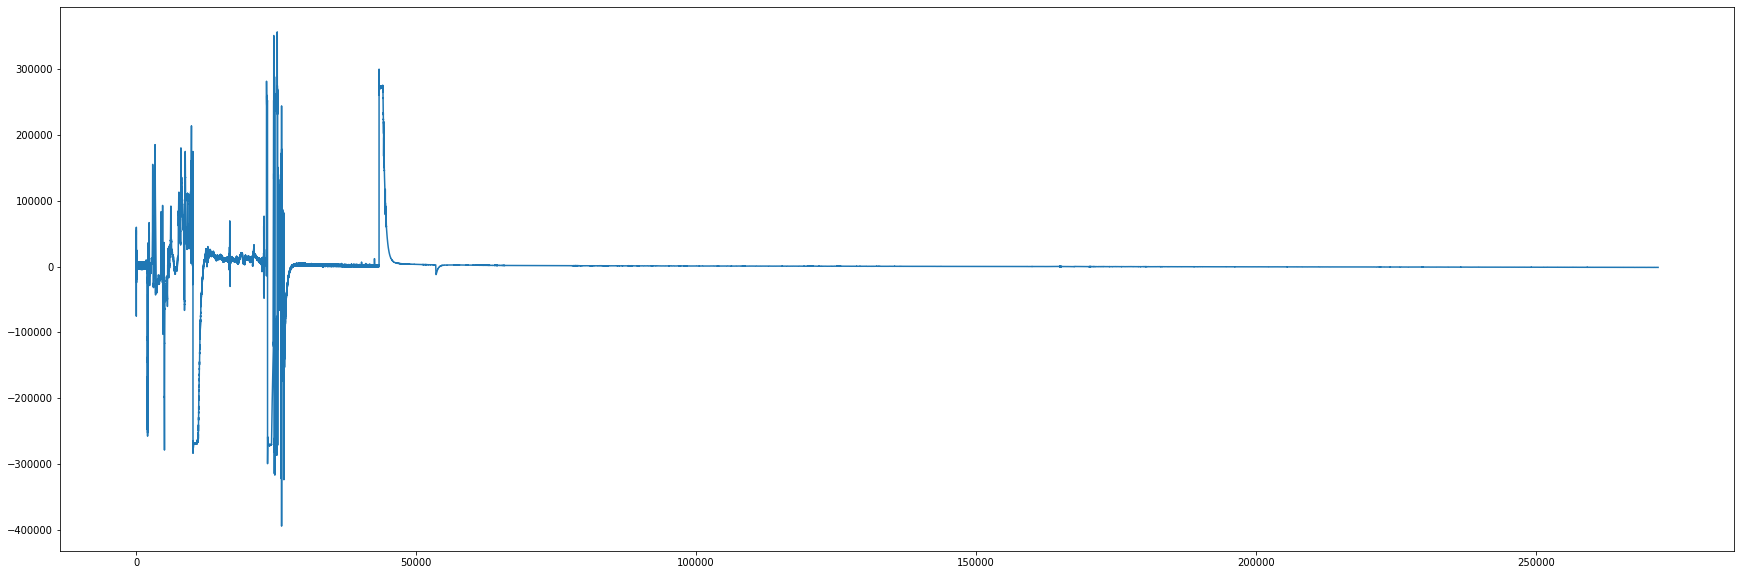

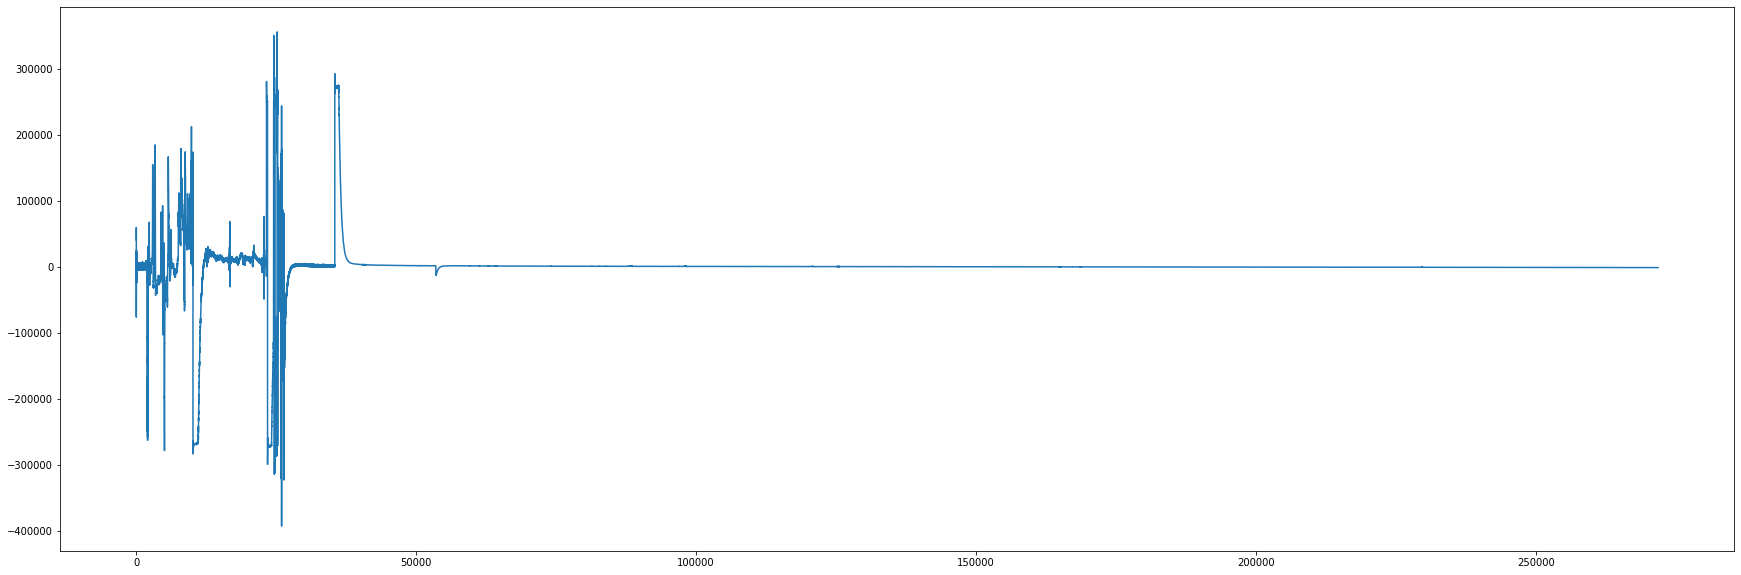

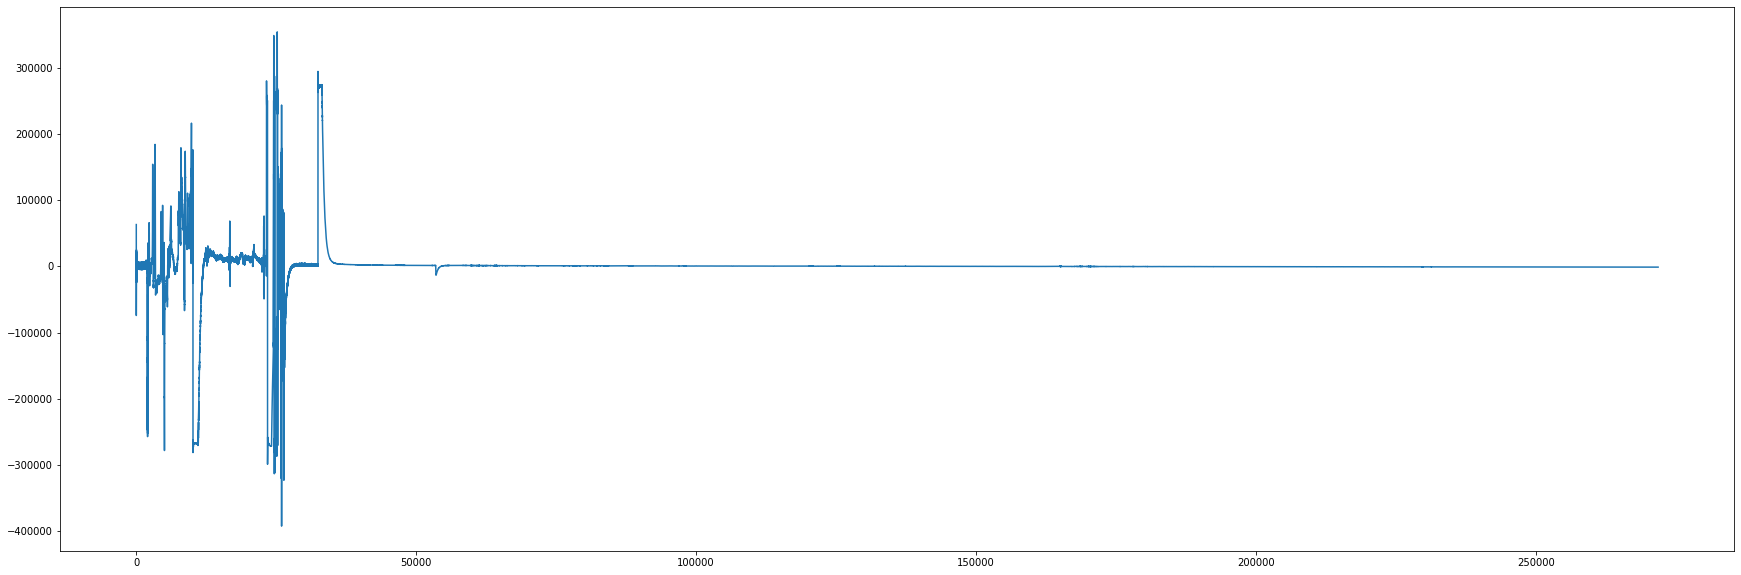

In [15]:
#P1_pre_training

t = range(271816)        
for i in range(16):
    
    x=P1_pre_training['y'][:,i]
    x=signal.detrend(x)
    
    plt.figure(figsize=(30,10))
    plt.plot(t,x)
    plt.show()

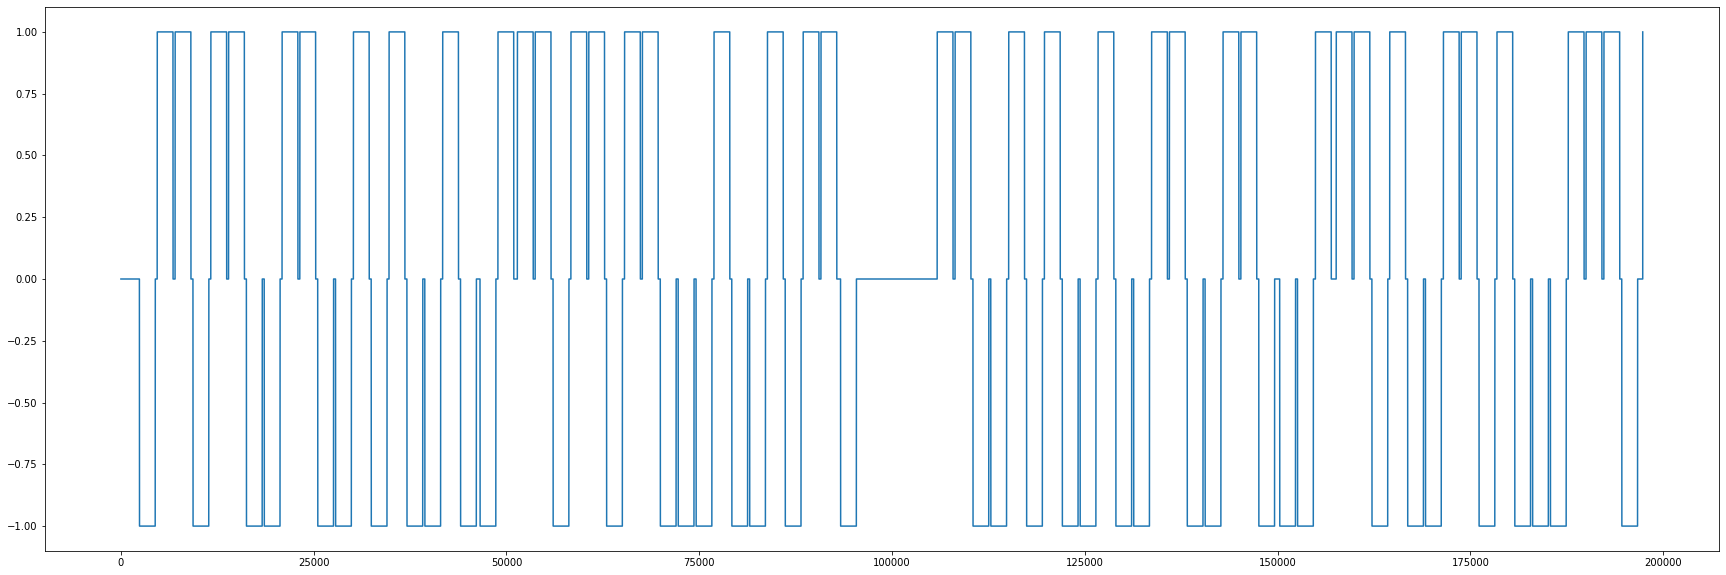

In [16]:
#labels
label_P1_post_training=P1_post_training['trig']
label_P1_post_training

#P1_pre_training

t = range(197343)        

plt.figure(figsize=(30,10))
plt.plot(t,label_P1_post_training[:,0])
plt.show()

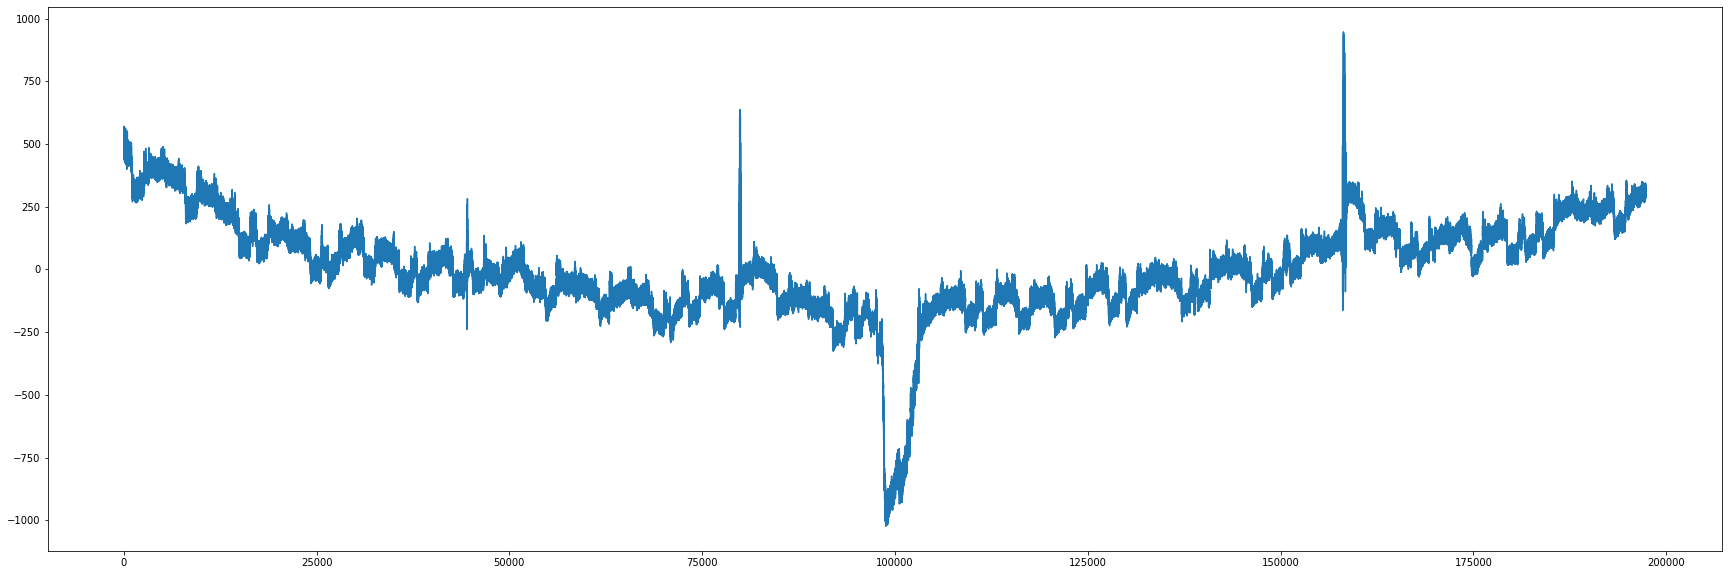

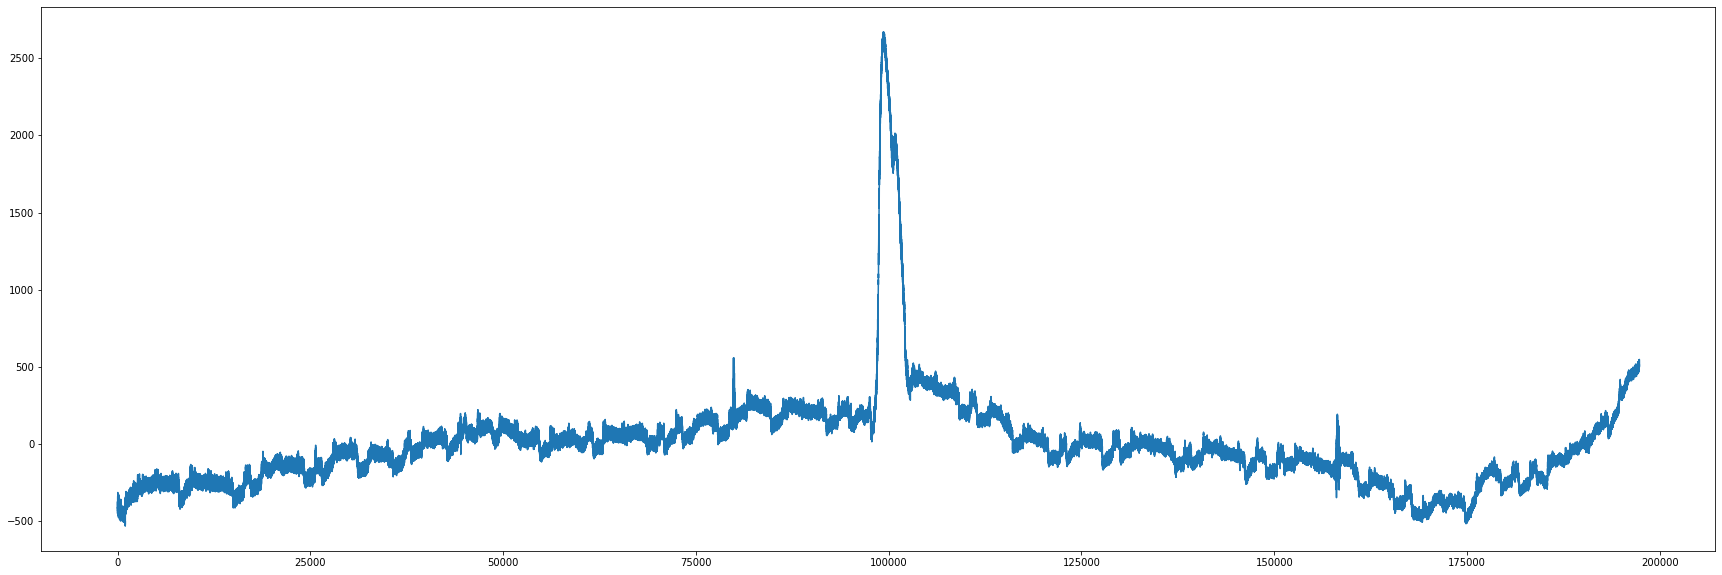

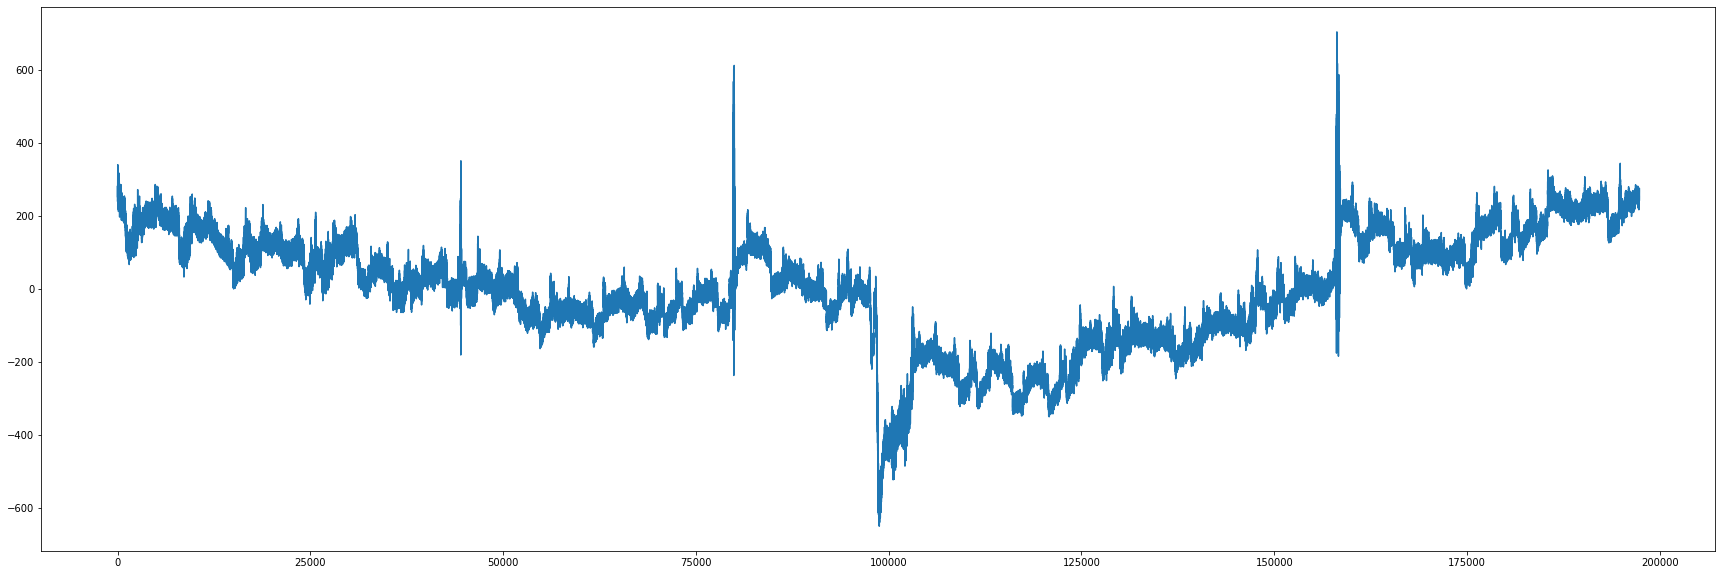

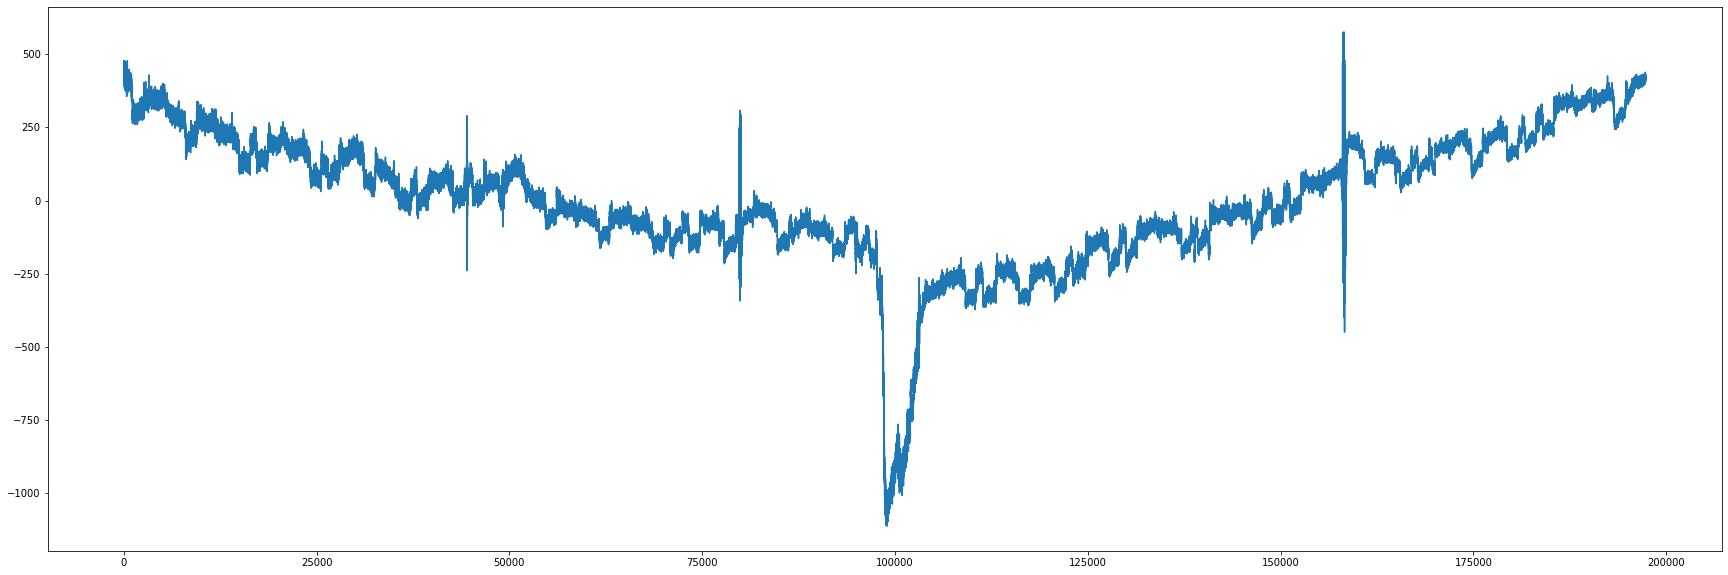

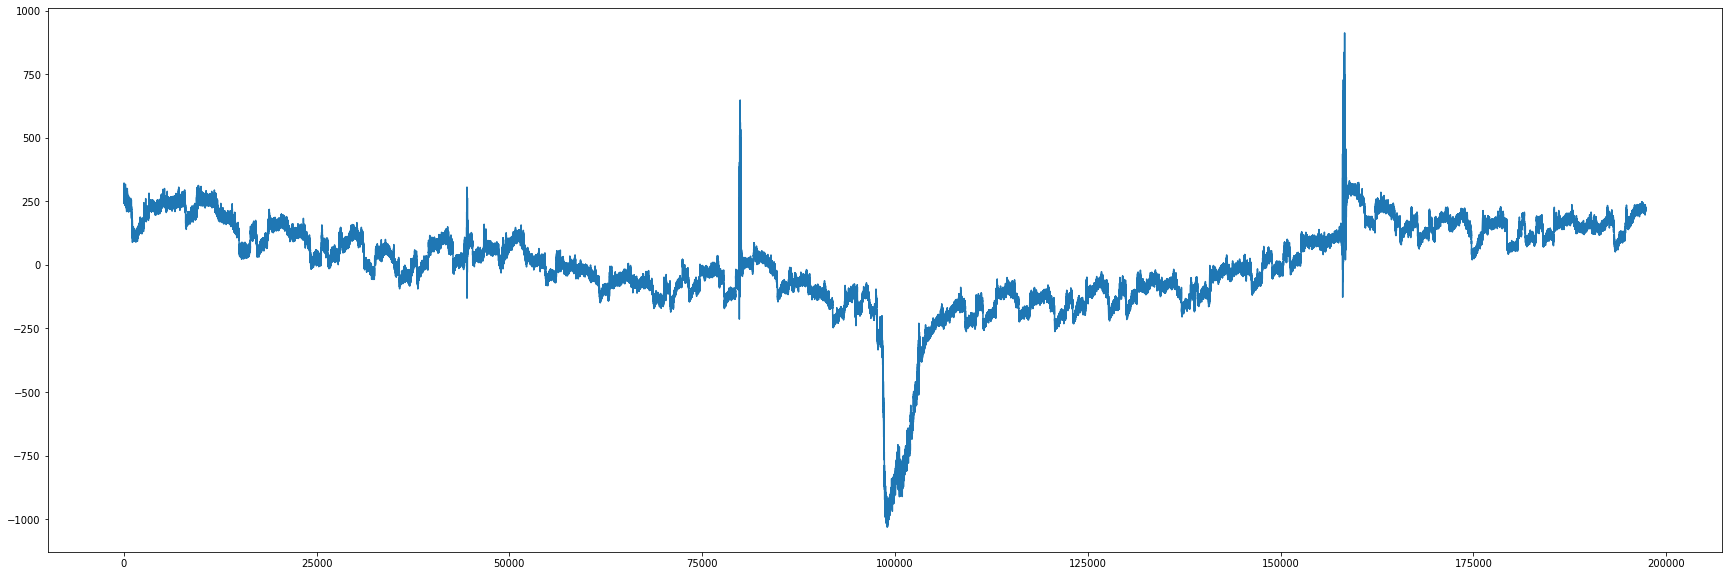

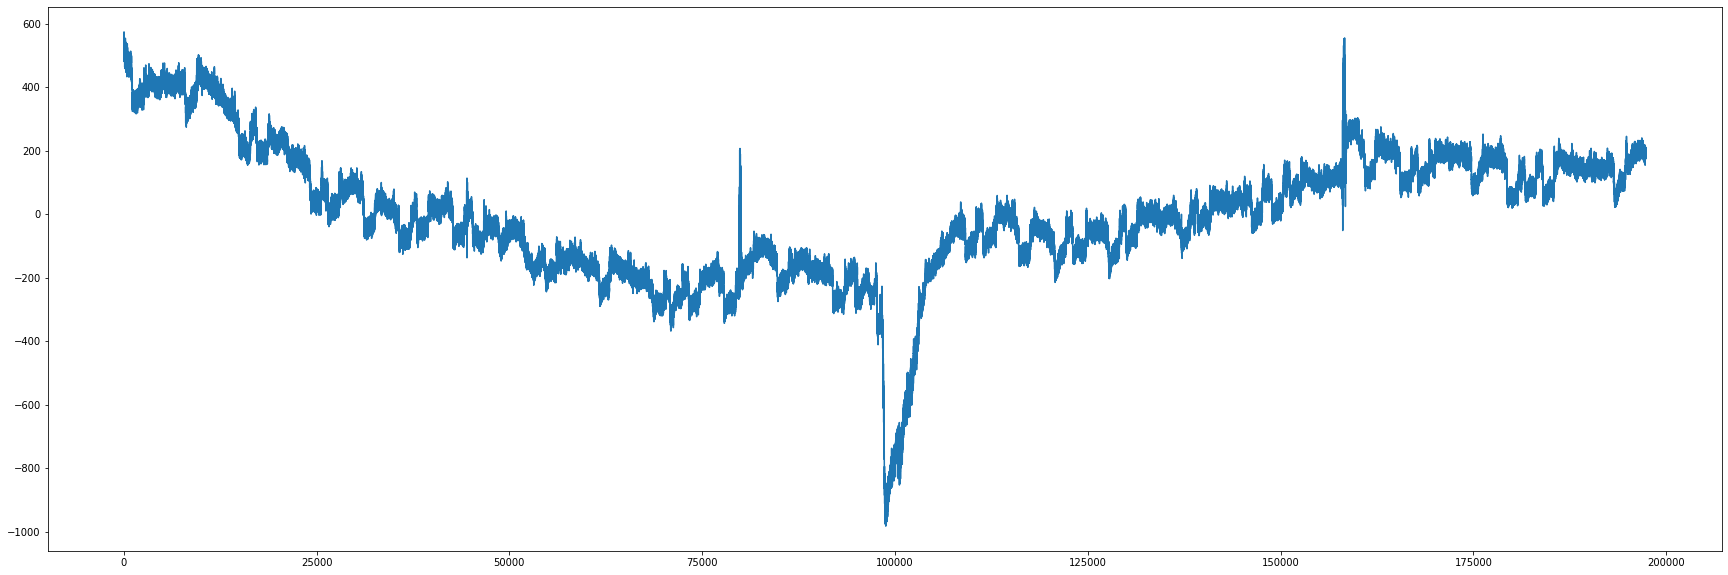

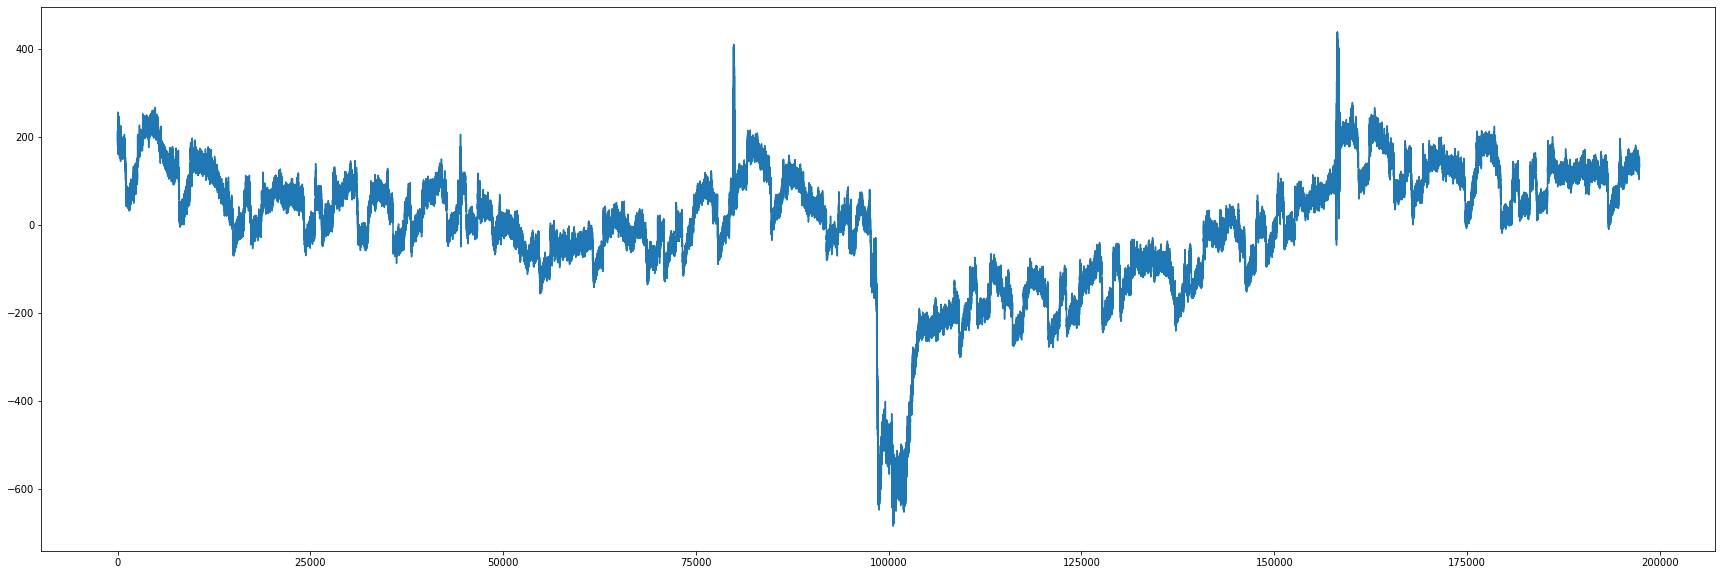

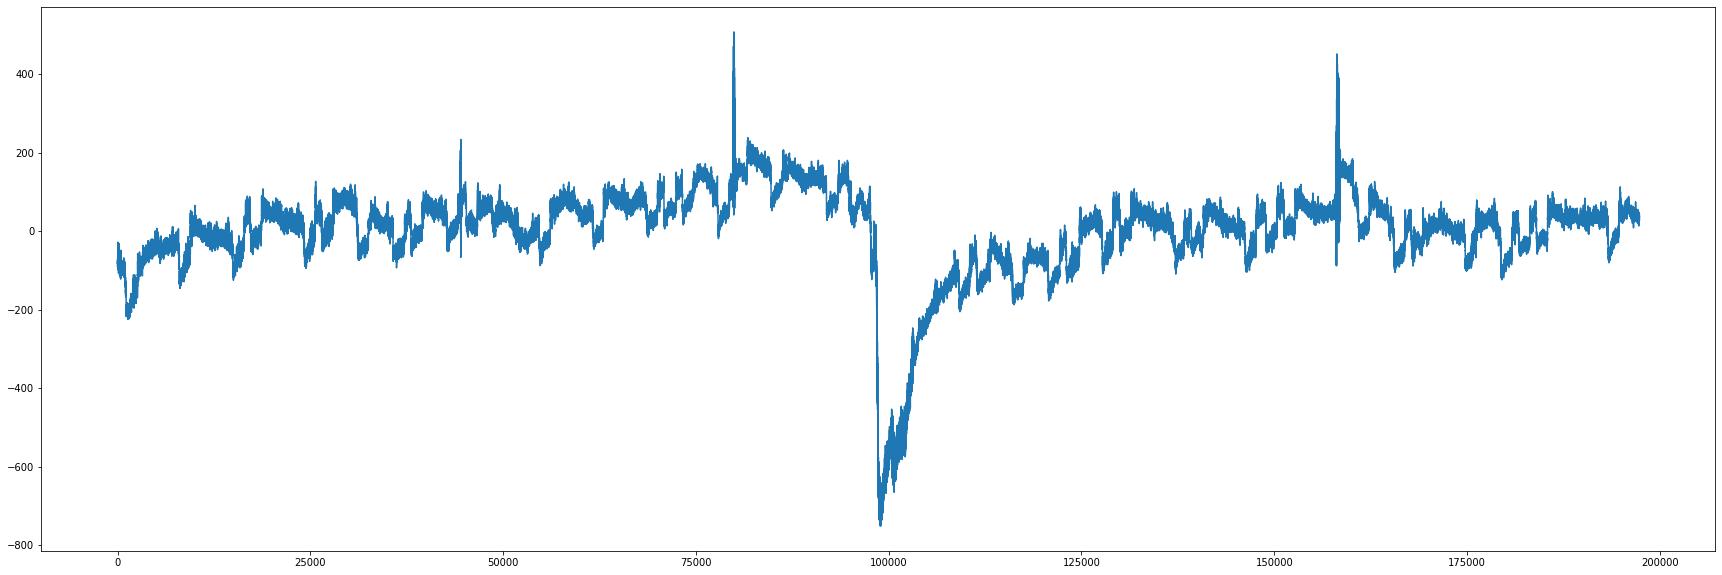

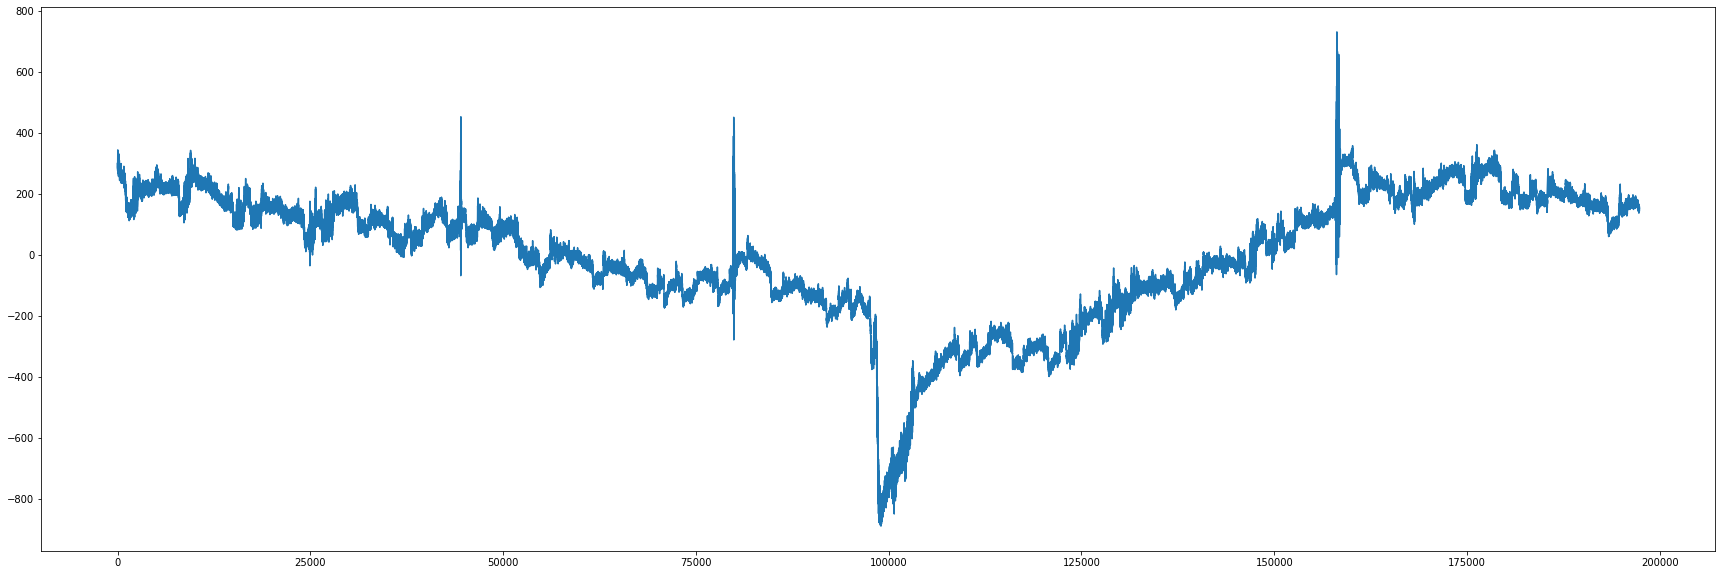

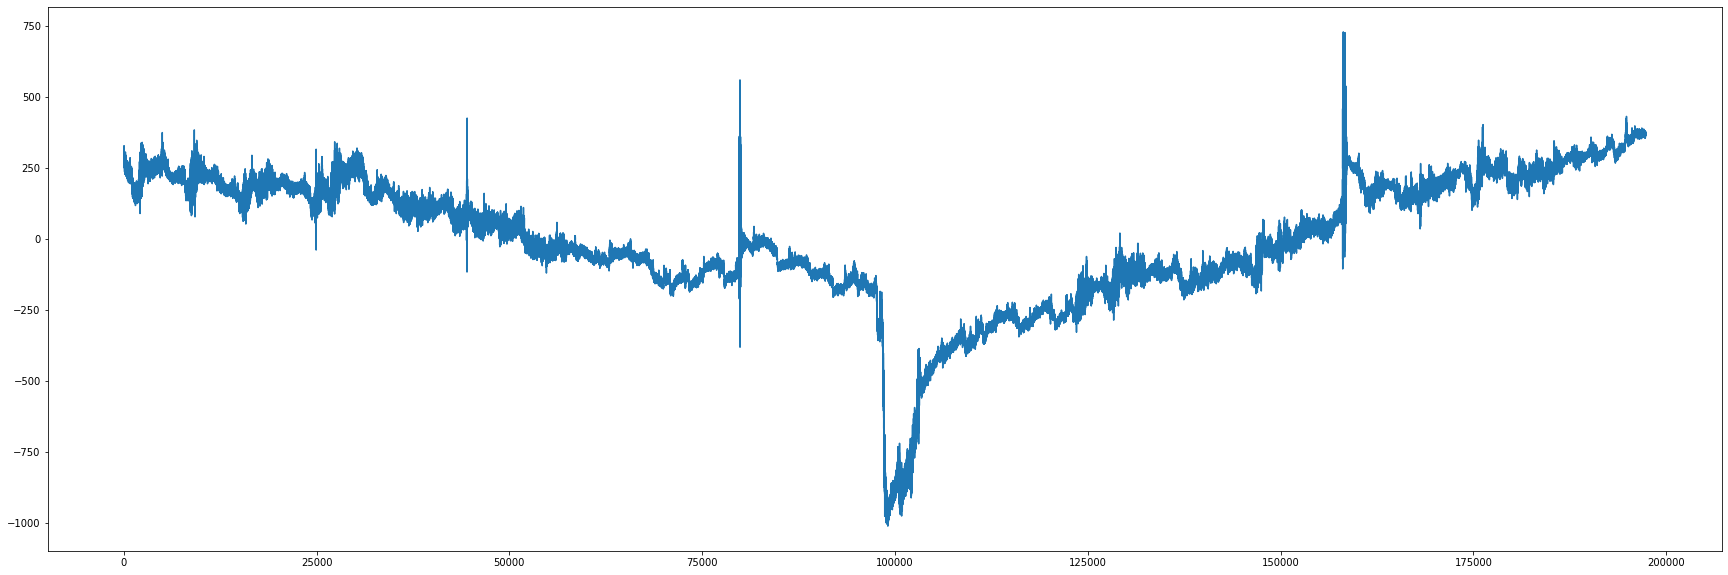

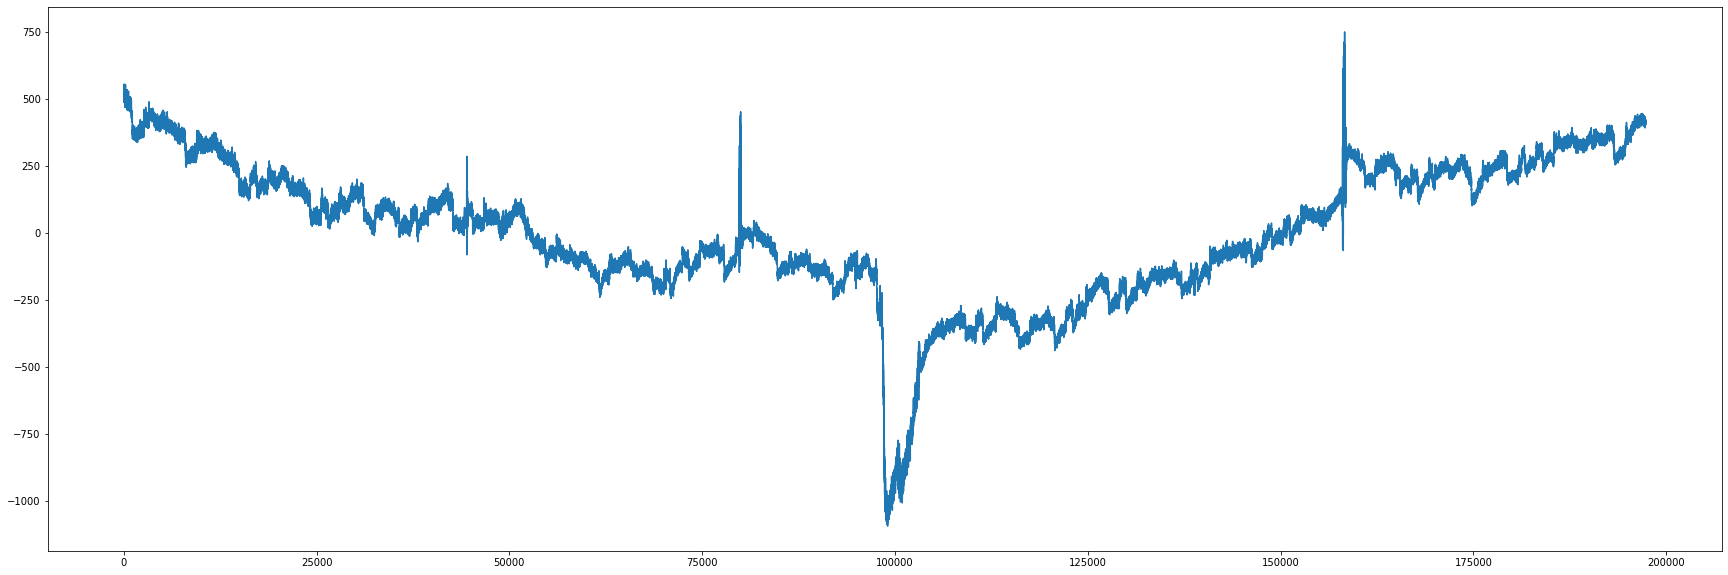

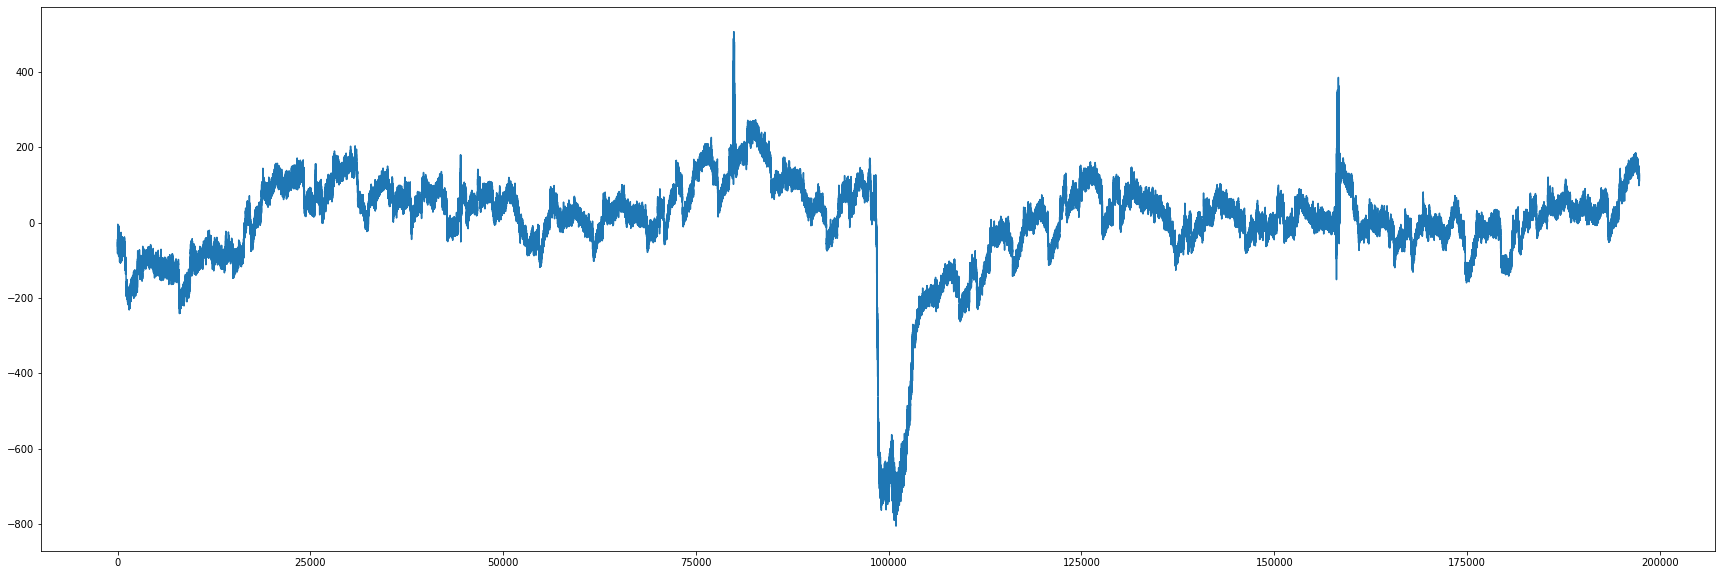

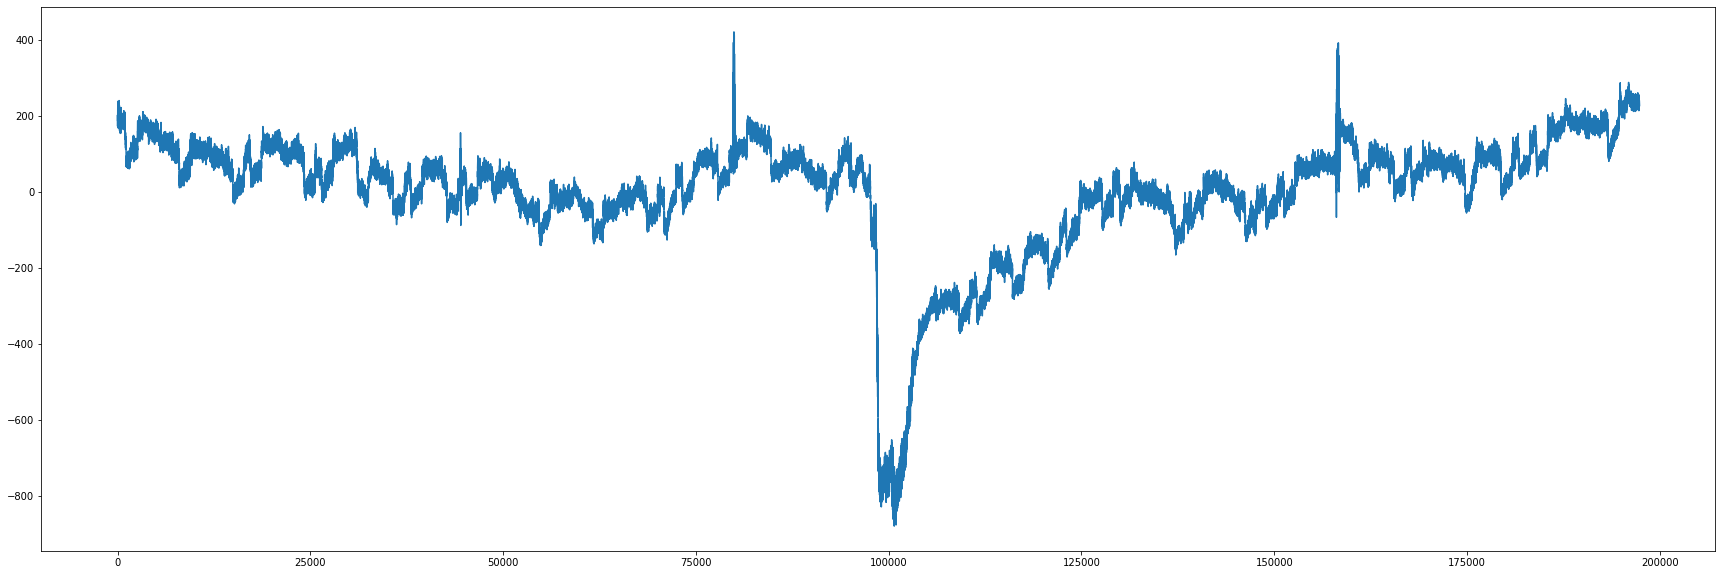

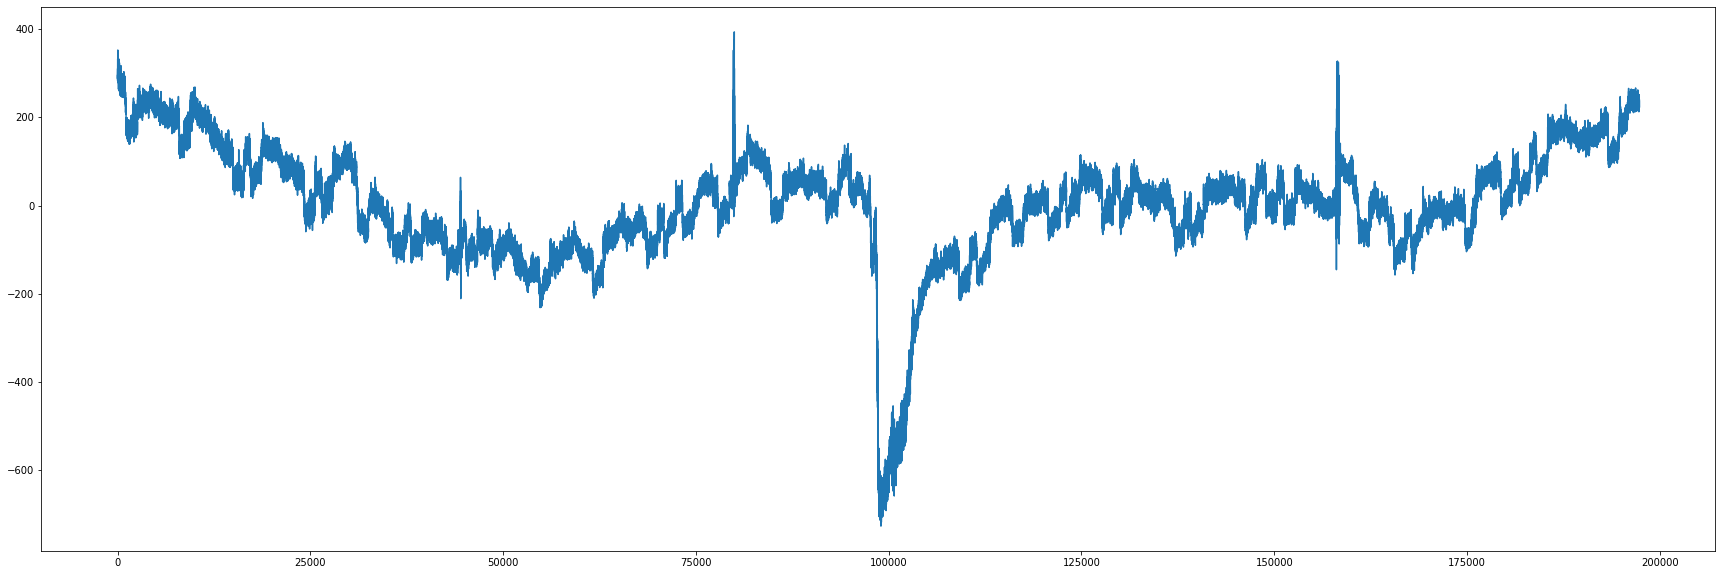

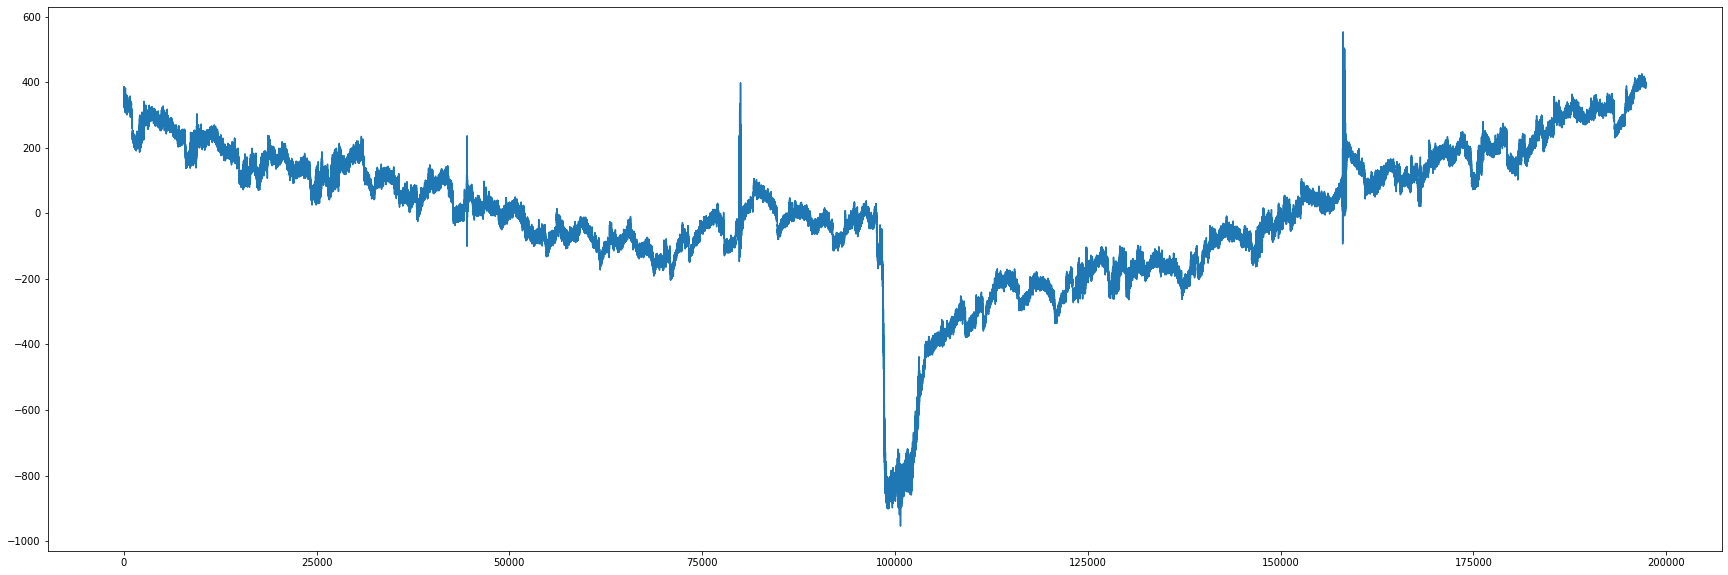

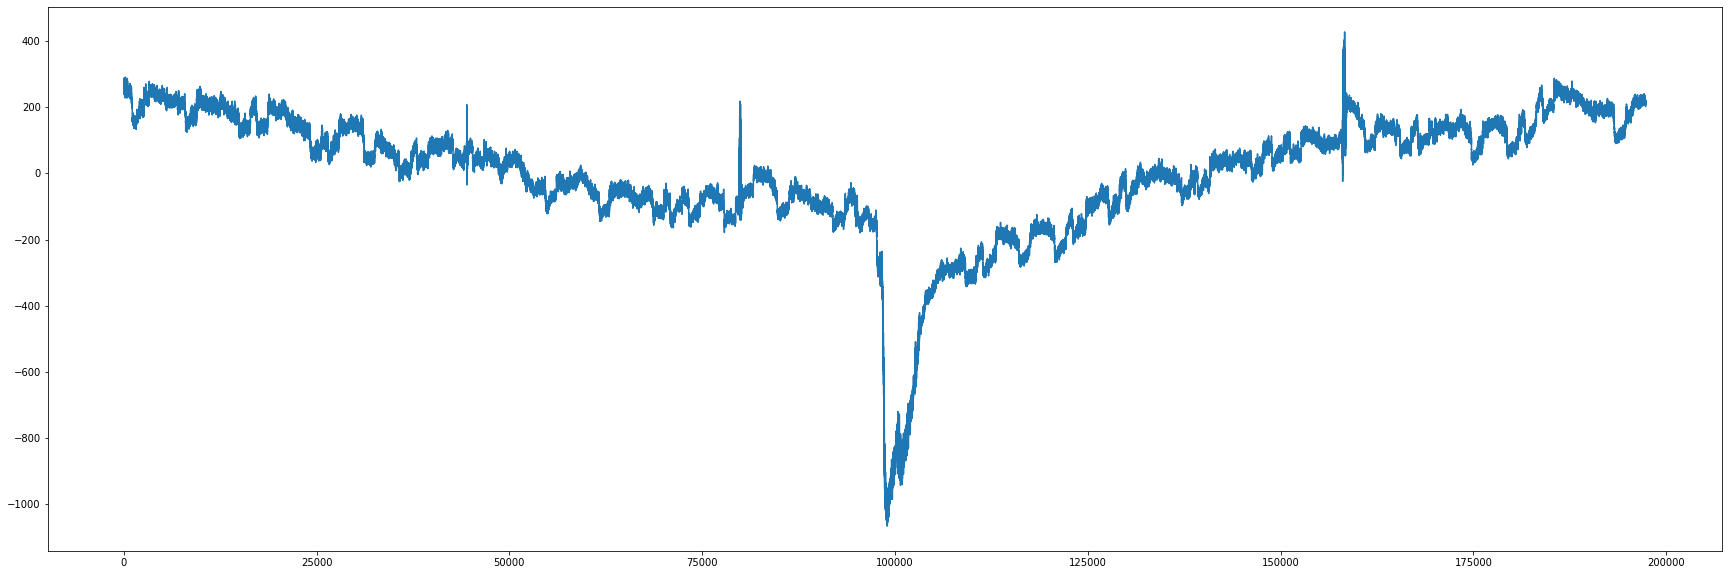

In [17]:
#P1_post_training

t = range(197343)       
for i in range(16):
    
    x=P1_post_training['y'][:,i]
    x=signal.detrend(x)
    
    plt.figure(figsize=(30,10))
    plt.plot(t,x)
    plt.show()

## Start with P1_pre_training
### Preprocessing (prepare samples and cut 0)

In [49]:
x=P1_pre_training['y'][:,:]
np.shape(x)

(271816, 16)

In [50]:
x=signal.detrend(x)
np.shape(x)

(271816, 16)

In [8]:
np.shape(label_P1_pre_training)

(271816, 1)

In [52]:
#cut the zeros
samples0=[]       #set of examples, each matrix represent a trial (59 channels X interval time)
labels0=[]

for i in range(len(label_P1_pre_training)):
    if label_P1_pre_training[i][0]!=0:
        labels0.append(label_P1_pre_training[i][0])
        samples0.append(x[i])

In [53]:
np.shape(samples0), np.shape(labels0), set(labels0)

((161809, 16), (161809,), {-1, 1})

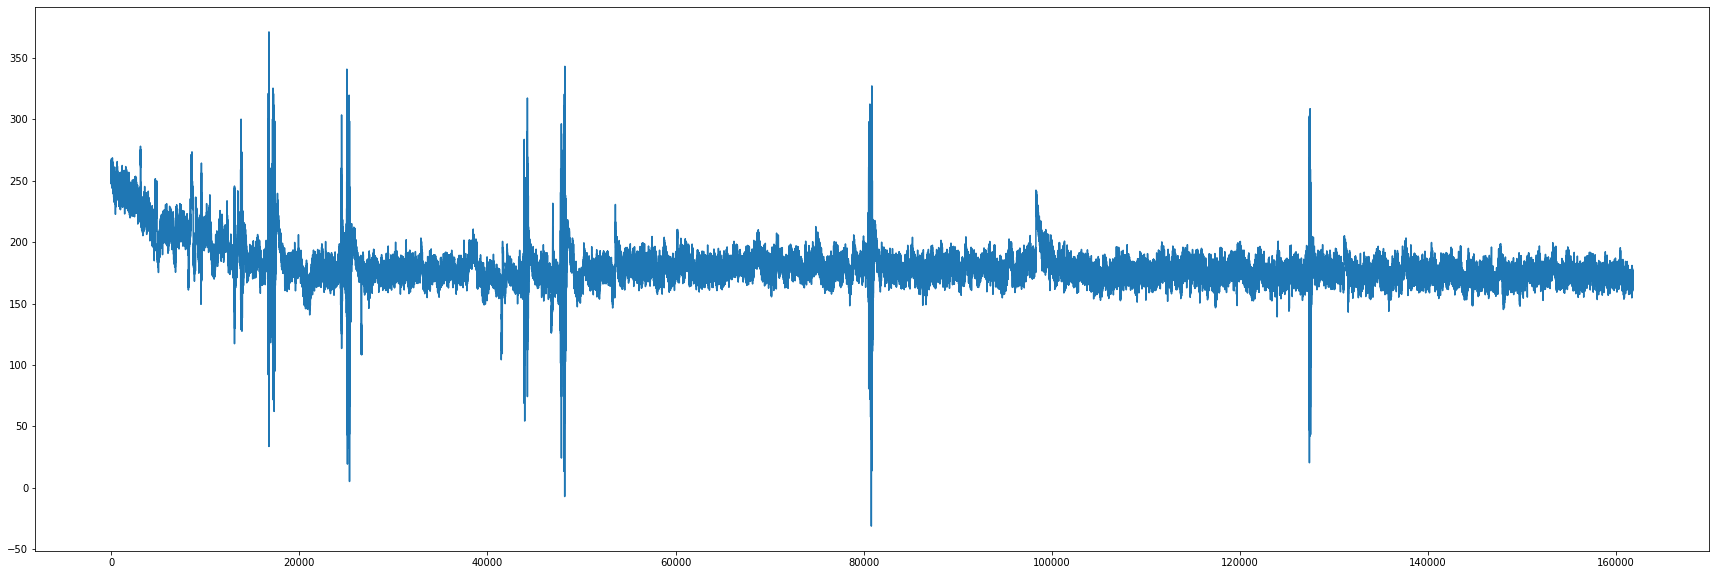

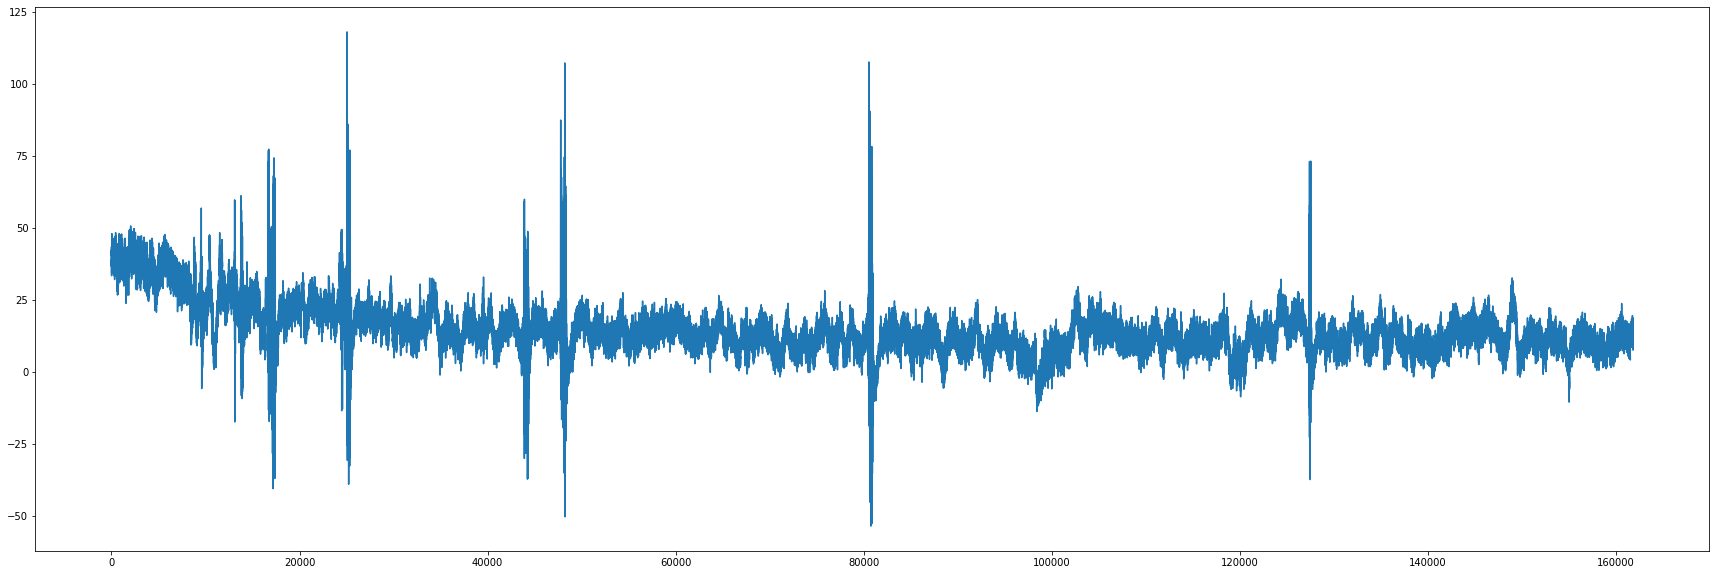

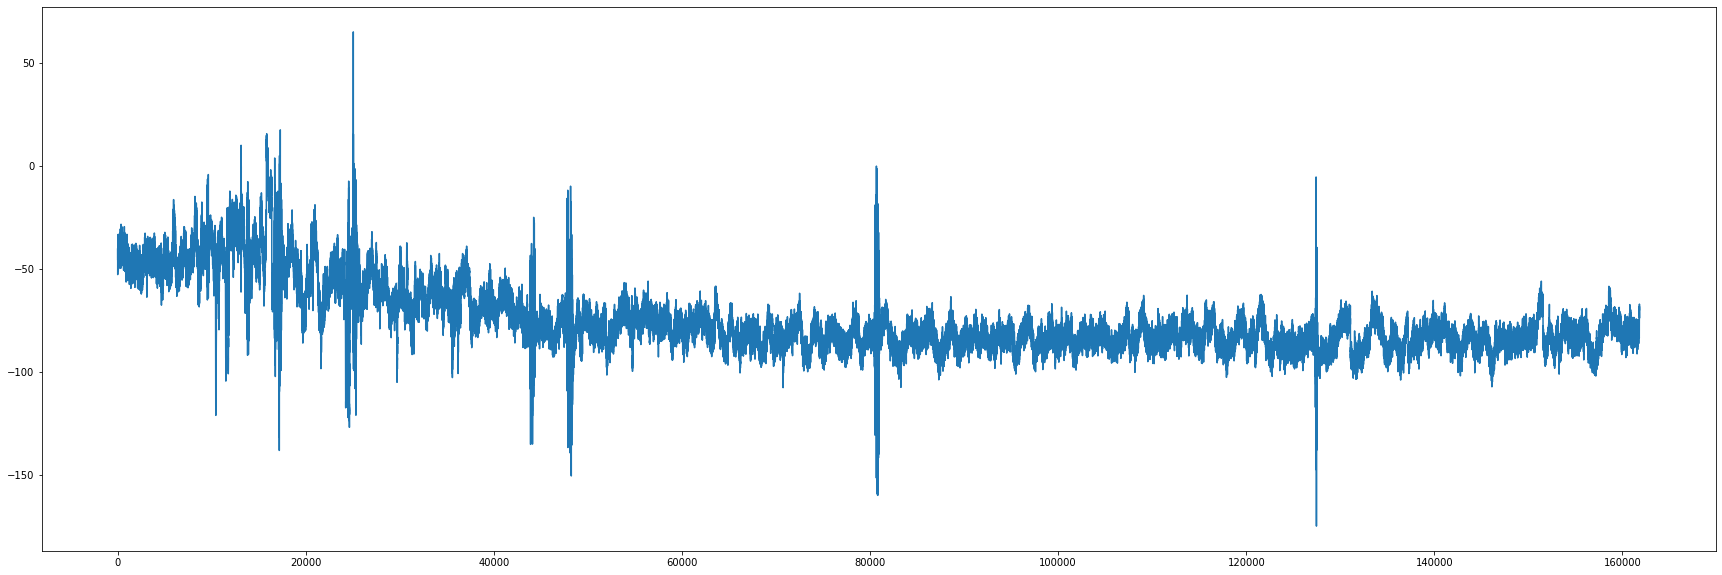

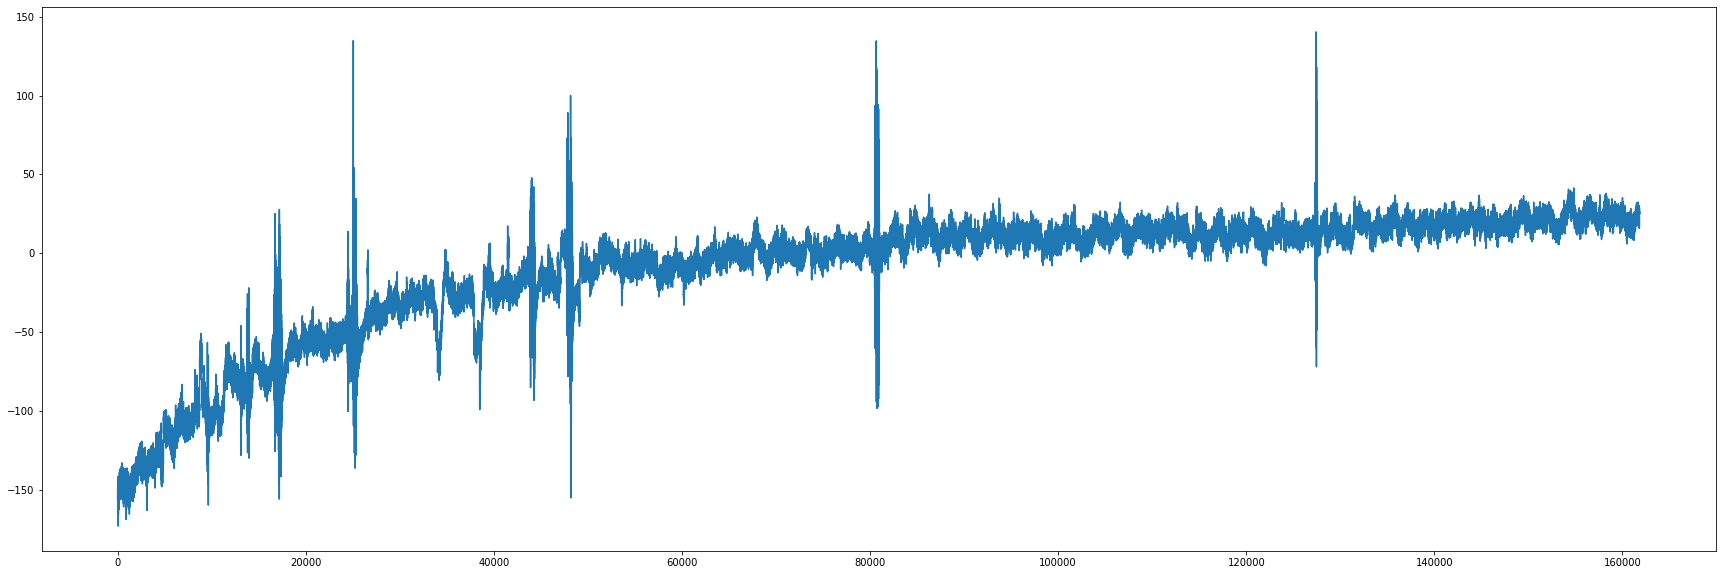

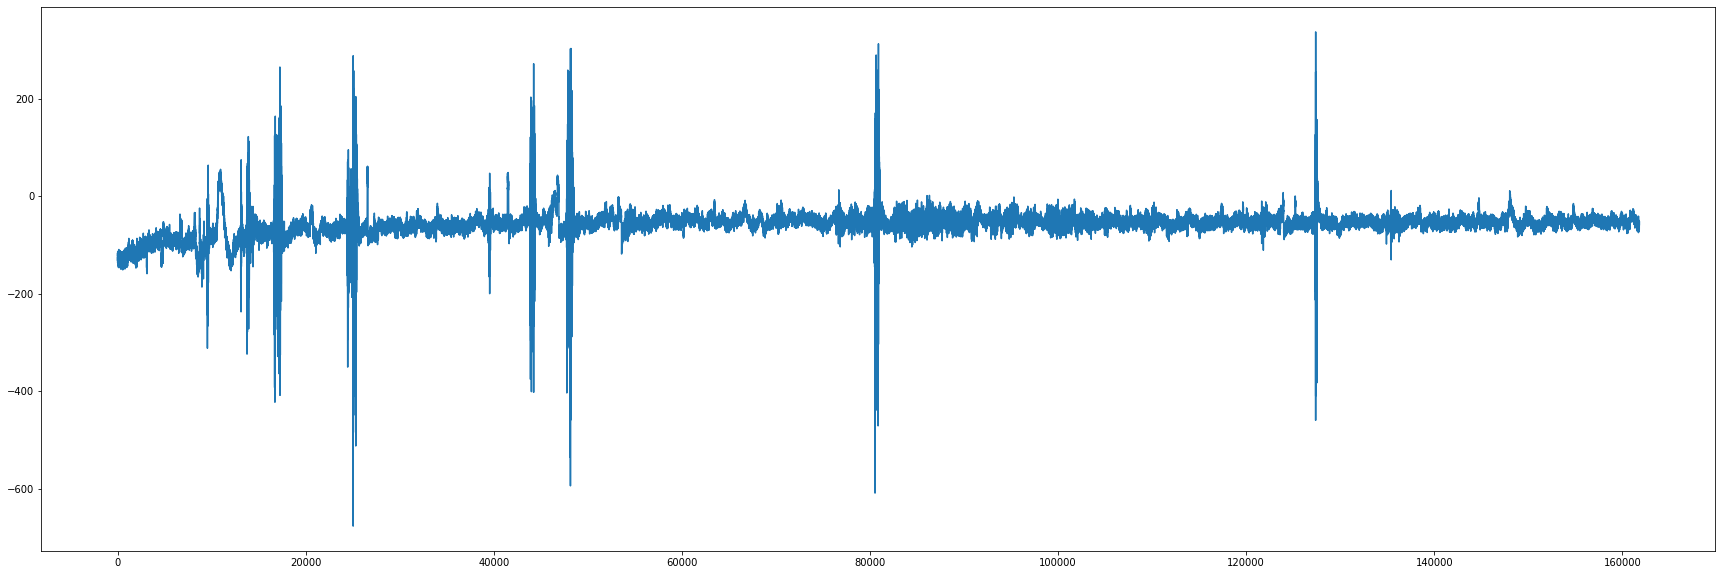

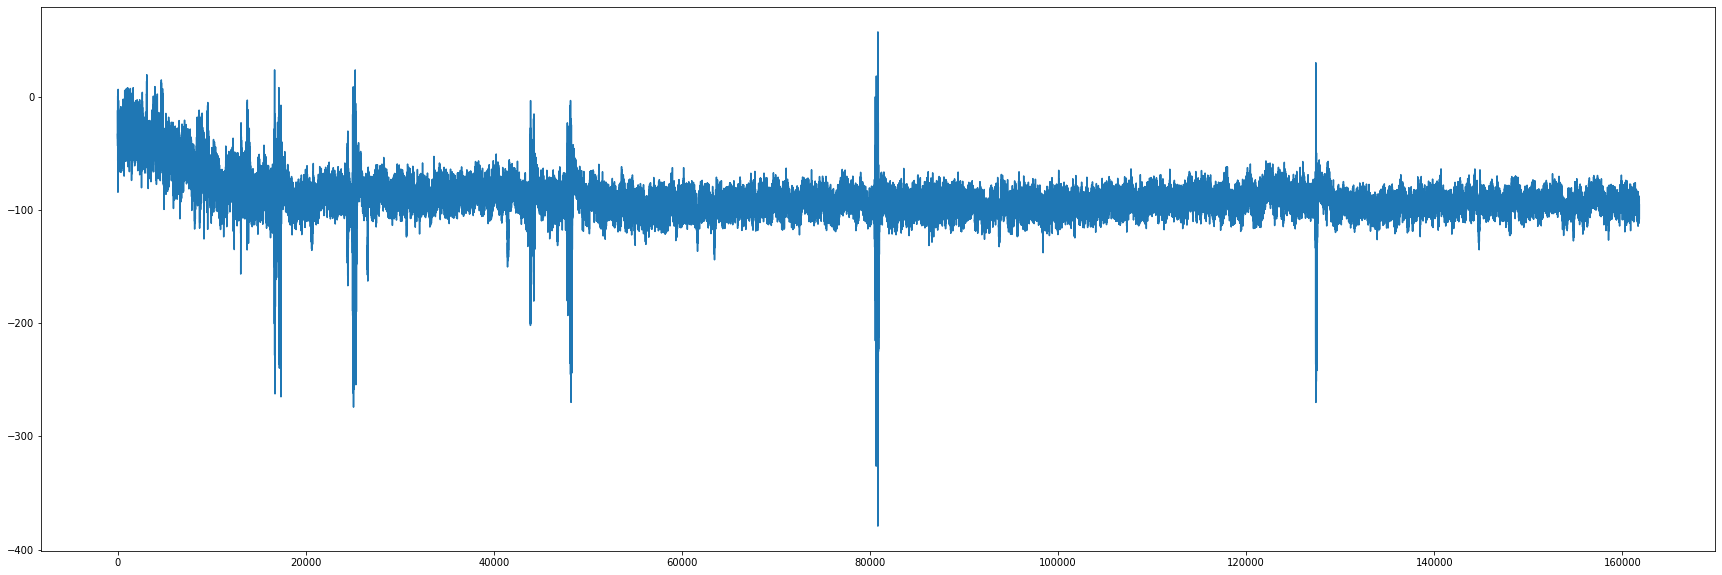

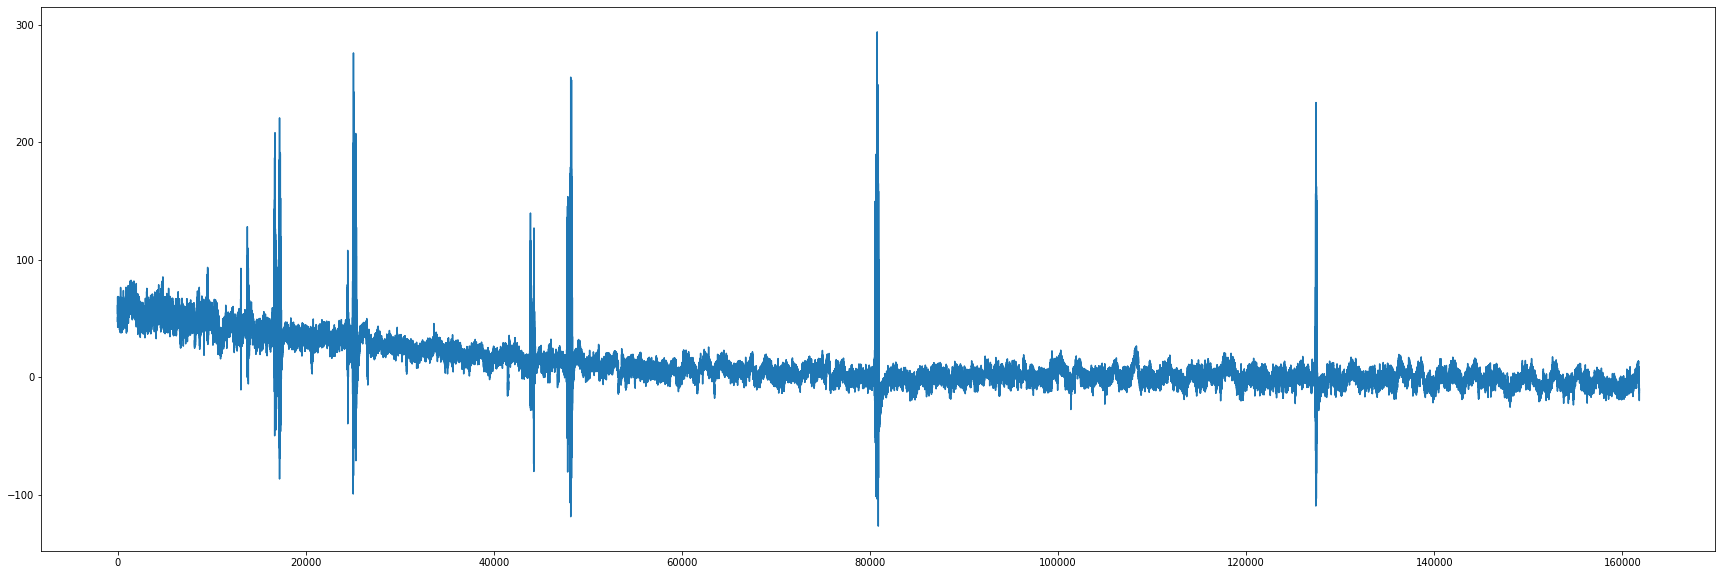

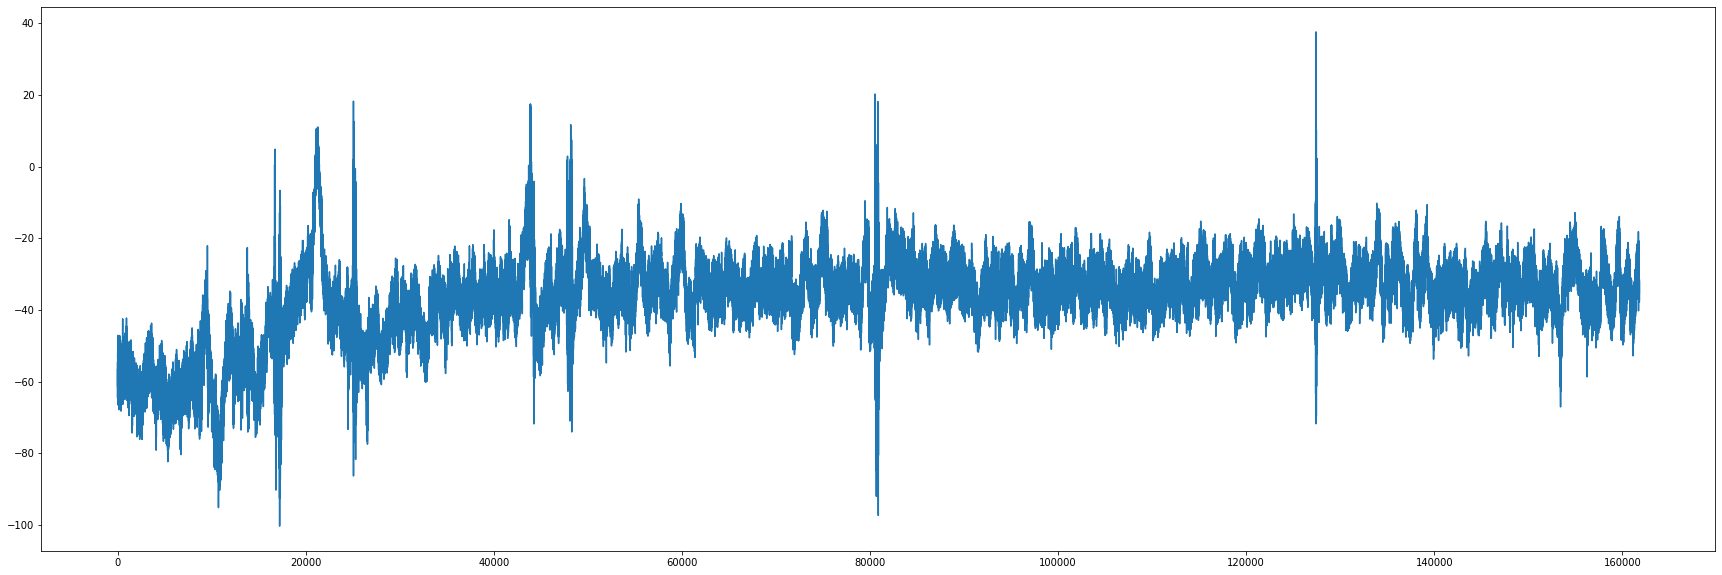

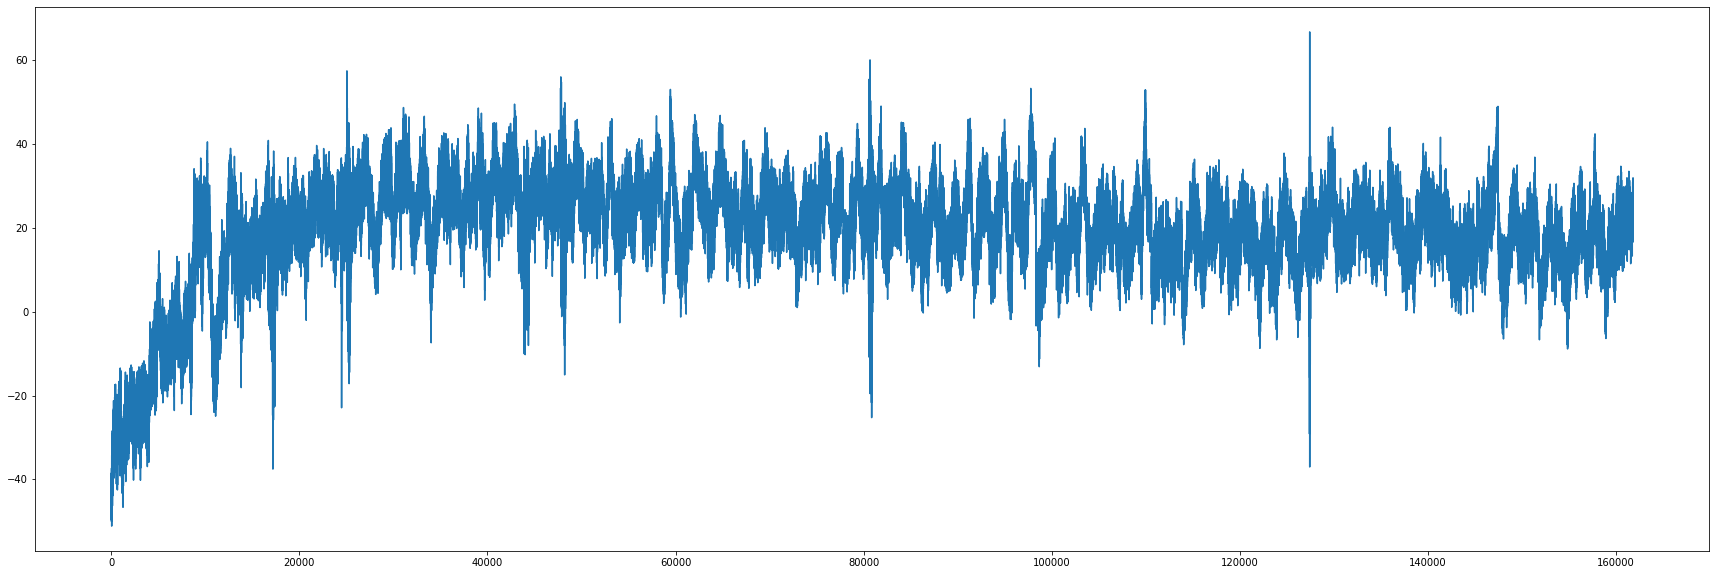

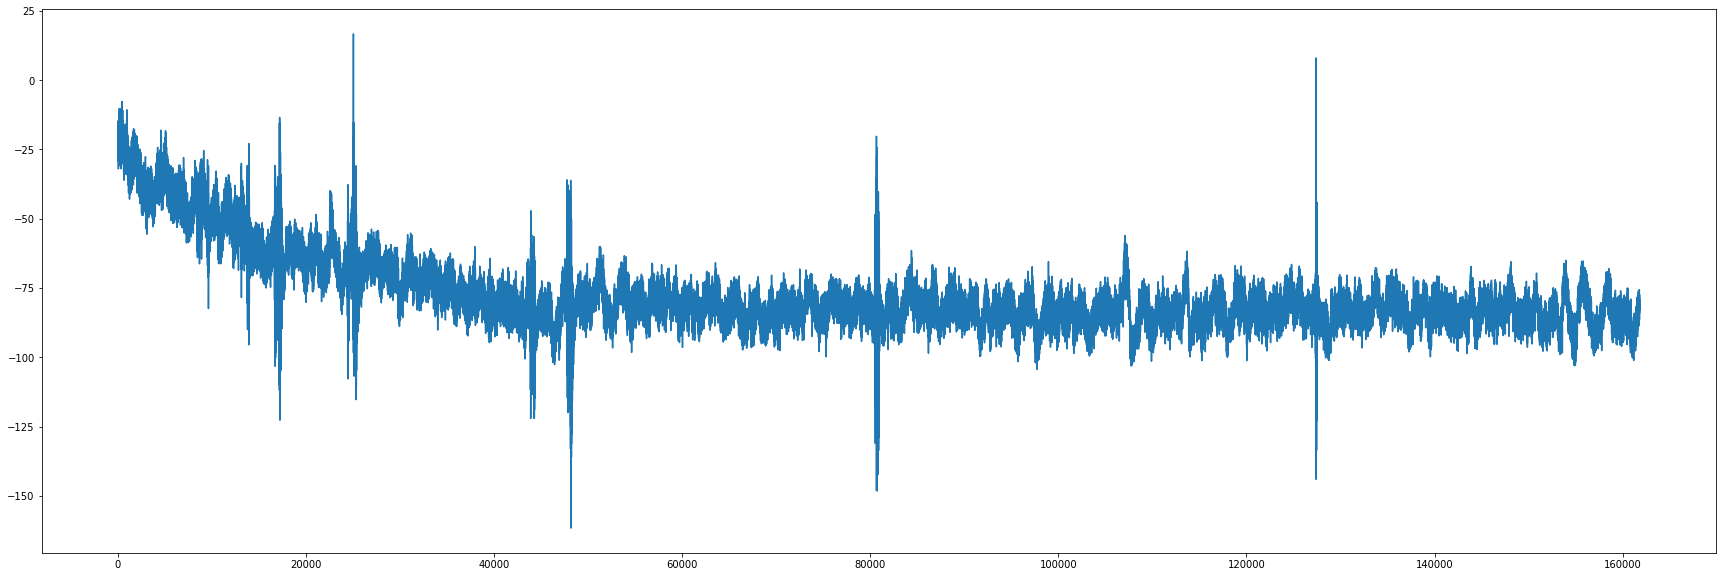

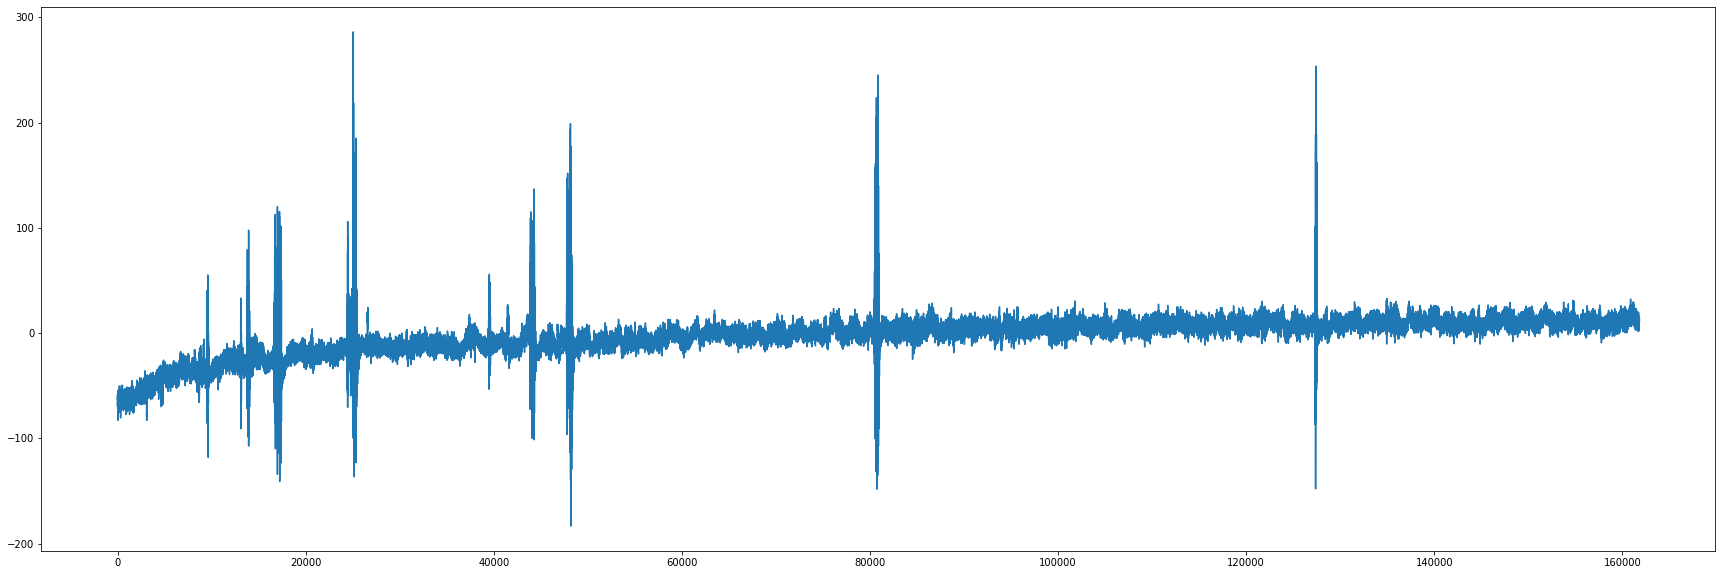

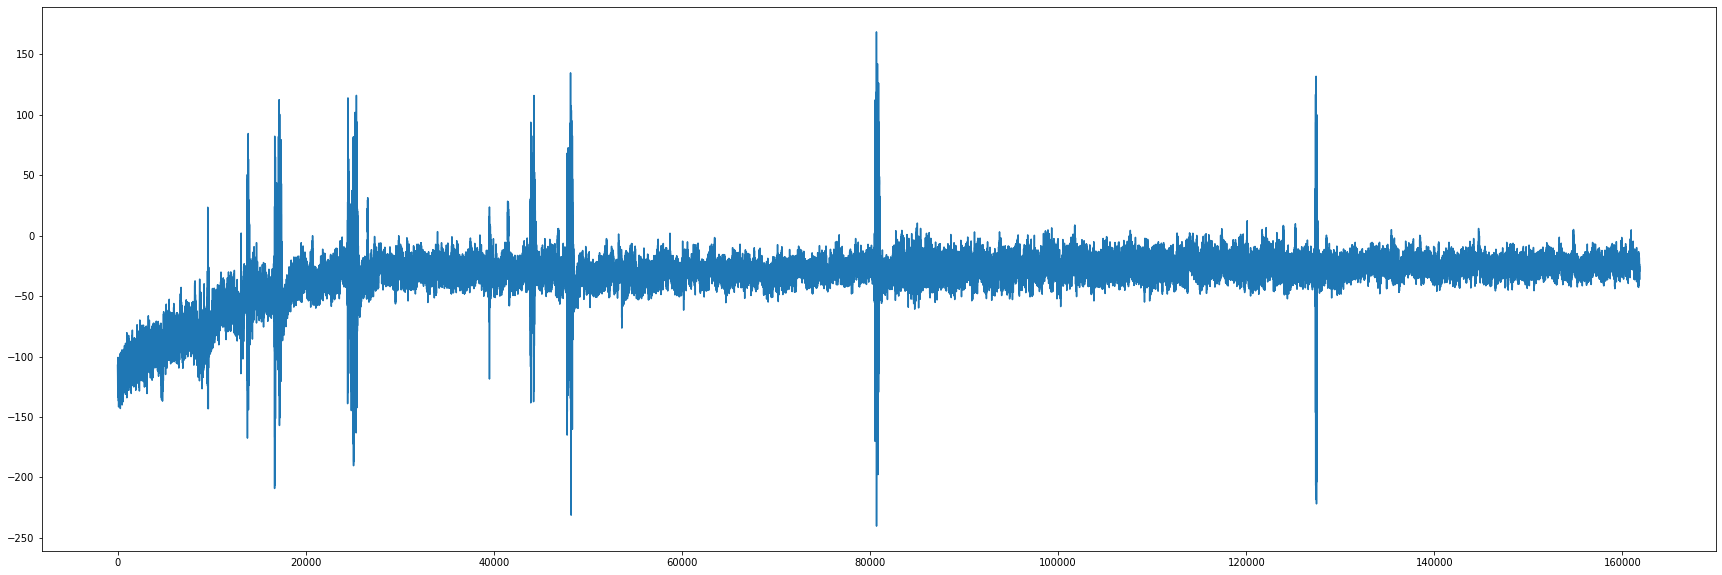

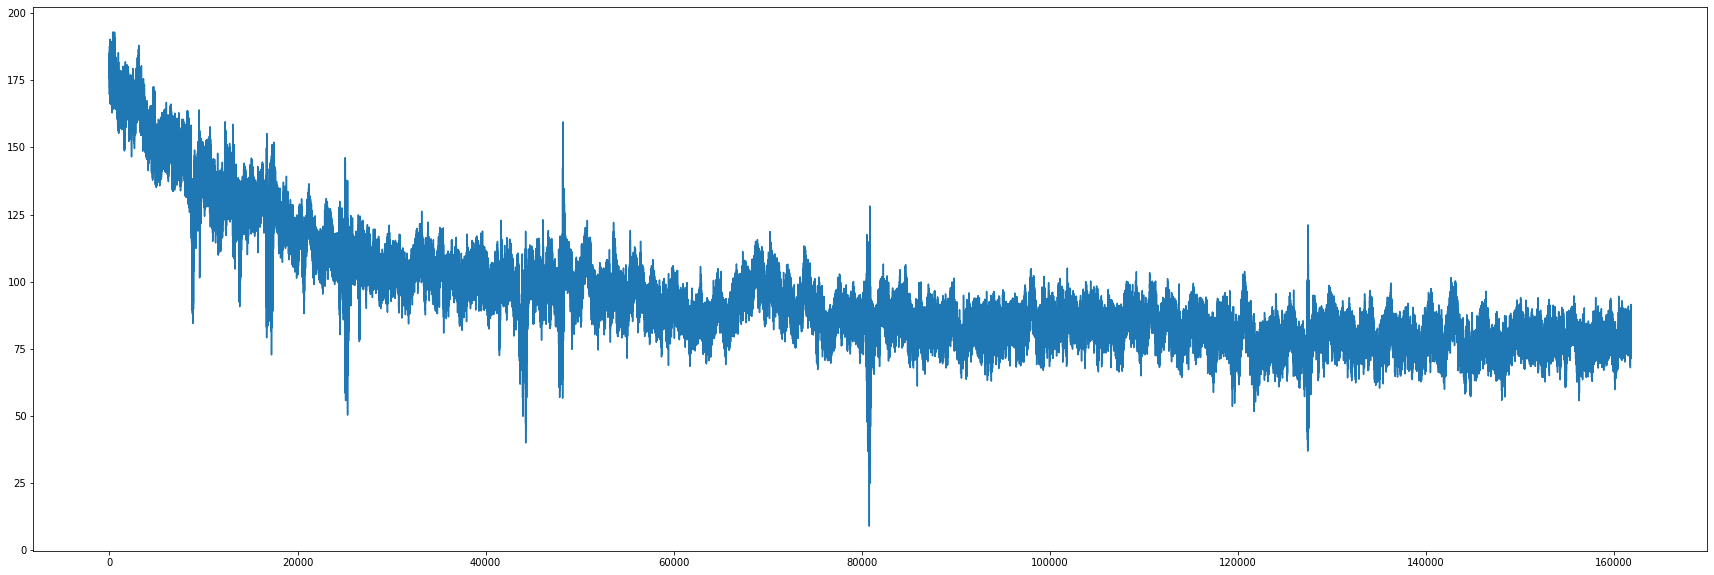

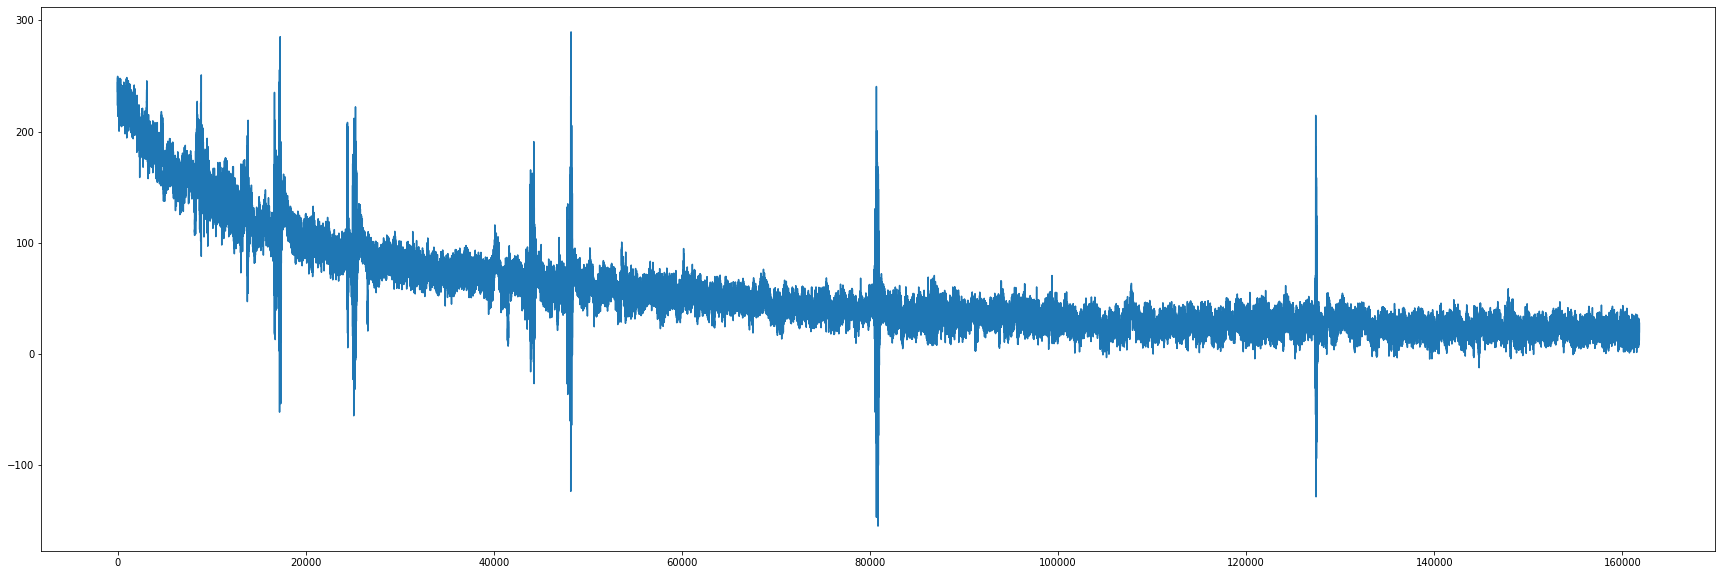

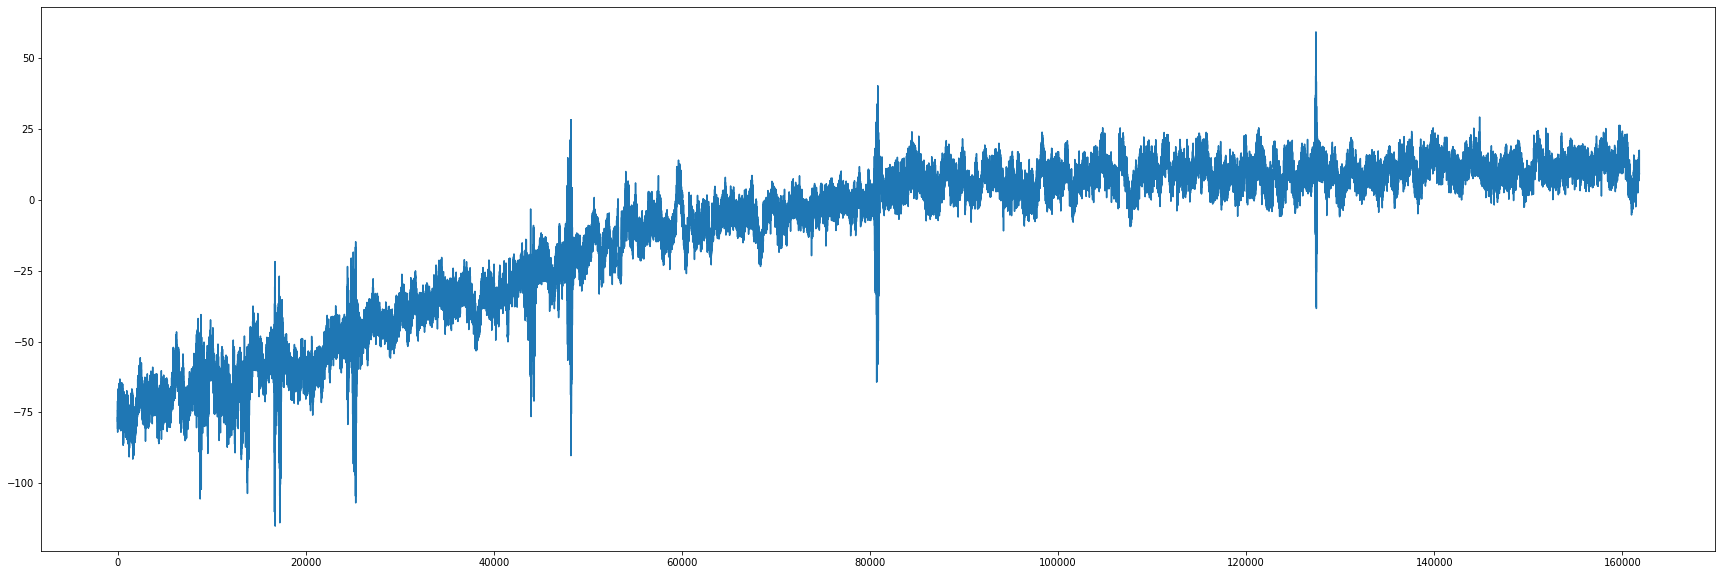

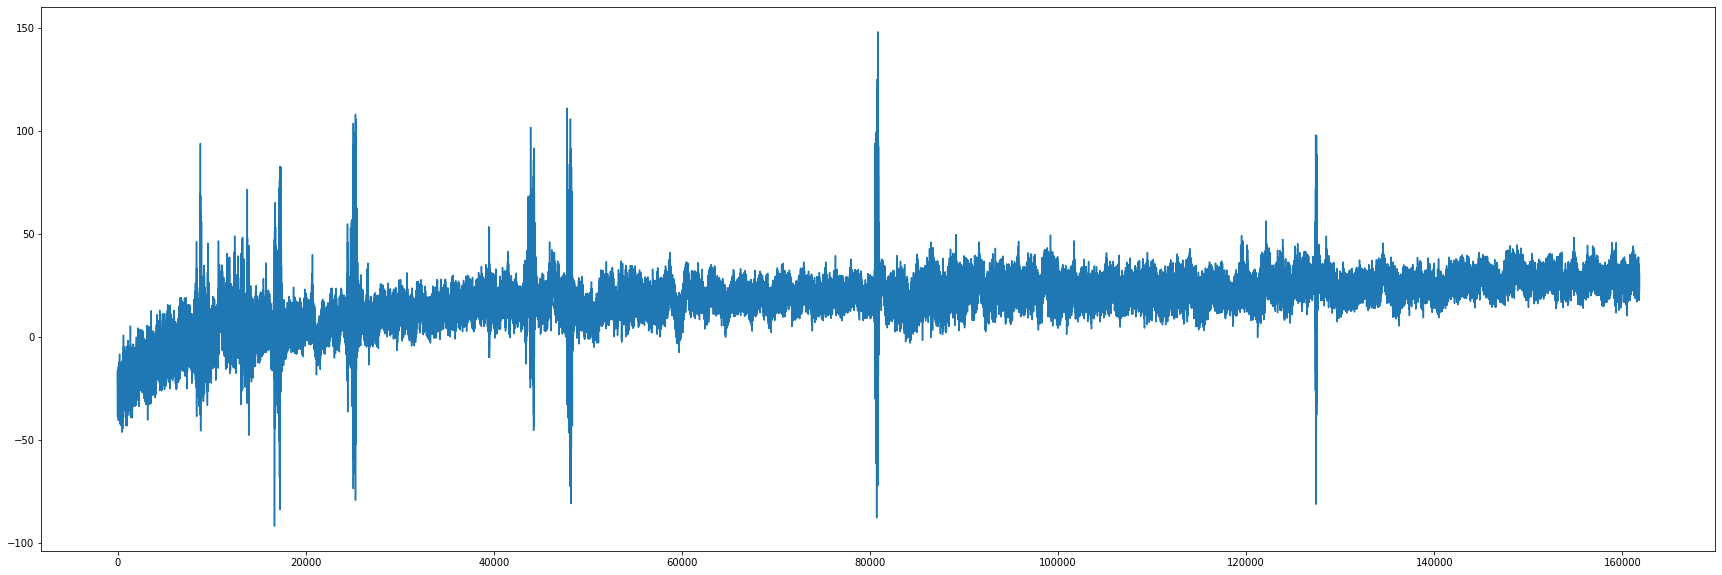

In [156]:
#P1_pre_training

t = range(161809)        
for i in range(16):
    
    x=(np.transpose(samples0))[i]
    
    plt.figure(figsize=(30,10))
    plt.plot(t,x)
    plt.show()

In [55]:
161809/2048, 161809%2048   #tolgo 17 campioni alla fine

(79.00830078125, 17)

In [71]:
k=0                                         #verifico
for i in range(2048*12,2048*13):
    if labels0[i]!=-1:
        k=k+1
        print(i)
k

0

In [85]:
np.shape(np.transpose(np.array(samples0)))

(16, 161809)

In [86]:
times=range(0,np.shape(samples0)[0]-17,2048)
samples=[]                                      #set of examples, each matrix represent a trial (59 channels X interval time)
labels=[]
for i in times:
    samples.append(np.transpose(np.array(samples0))[:,i:i+2048])  
    labels.append(labels0[i])

In [87]:
np.shape(samples), np.shape(labels) #set(labels)

((79, 16, 2048), (79,))

## UMAP

In [88]:
import scipy.integrate as si
import umap
import umap.umap_ as umap

In [89]:
dt=1/256
dt

0.00390625

In [90]:
def return_ms(signal, dt = 0.003, granularity = 30):
    
    empty_vec = []
     
    for i in range(0,signal.shape[0], granularity):
        
        if (signal.shape[0] <= i + granularity):
            pivot = signal[i:]
            value = si.simps(pivot, dx = dt)/pivot.shape[0]
            empty_vec.append(value)
            
            return np.array(empty_vec)
        
        pivot = signal[i:i+granularity ]
        value = si.simps(pivot,dx = dt)/granularity 
        empty_vec.append(value)
        
    return np.array(empty_vec)

In [91]:
np.shape(samples[0][0]) #sample 0, canale 0

(2048,)

In [92]:
prova = return_ms(np.transpose(samples[0][0]))

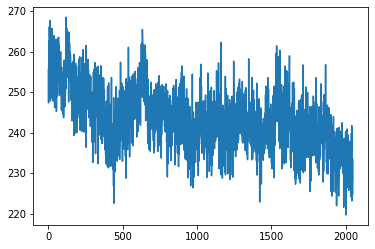

In [93]:
plt.plot(samples[0][0])
plt

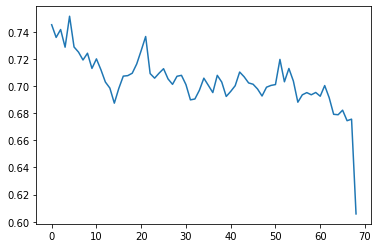

In [94]:
plt.plot(prova)

In [95]:
np.shape(prova)

(69,)

In [96]:
2048/30

68.26666666666667

In [97]:
new_samples=[]
for i in range(len(samples)):
    v=[]
    for j in range(16):
        prova = return_ms(np.transpose(samples[i][j]))
        v.append(prova)        
    new_samples.append(v)

In [114]:
np.shape(new_samples)   #79 matrici 16 x 69 ---> trasforma in 79 vettori 1x(16*69)=1x1104

(79, 16, 69)

In [118]:
new_samples=np.array(new_samples)

In [119]:
X = np.reshape(new_samples, (79,16*69))

In [134]:
np.shape(samples)

(79, 16, 2048)

In [136]:
X = np.reshape(samples, (79,16*2048))

In [137]:
np.shape(X)

(79, 32768)

In [138]:
embedding = umap.UMAP().fit_transform(X, y=np.array(labels))

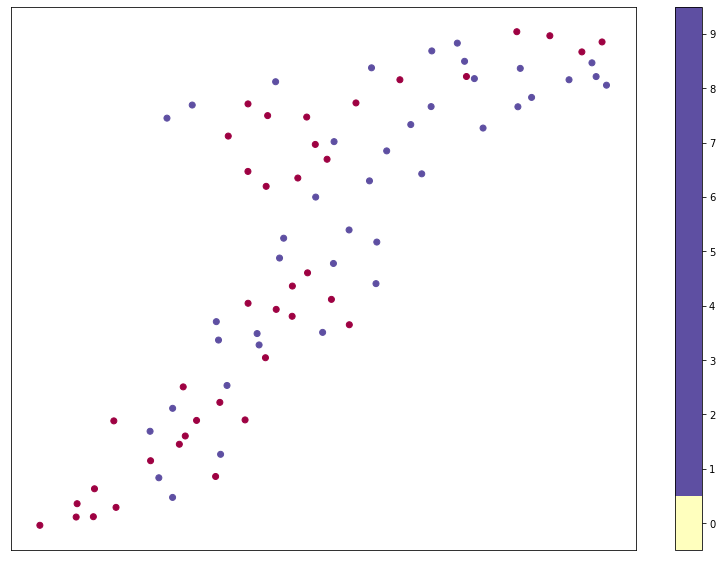

In [139]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T,  c=np.array(labels), cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))

In [140]:
reducer = umap.UMAP(random_state=42)

In [141]:
embedding=reducer.fit_transform(X, y=np.array(labels))

In [142]:
embedding = reducer.transform(X)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

(79, 2)

Text(0.5, 1.0, 'UMAP projection of the Features Vectors')

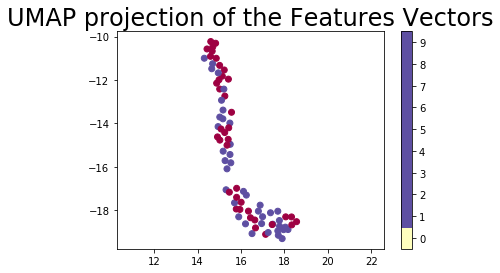

In [143]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='Spectral')  
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Features Vectors', fontsize=24)

In [144]:
np.shape(samples)

(79, 16, 2048)

In [145]:
np.array(samples).shape

(79, 16, 2048)

In [146]:
dati = np.reshape(np.array(samples), (79,16*2048))

In [147]:
dati.shape

(79, 32768)

In [148]:
embedding = umap.UMAP(n_neighbors=15).fit_transform(X, y=np.array(labels))

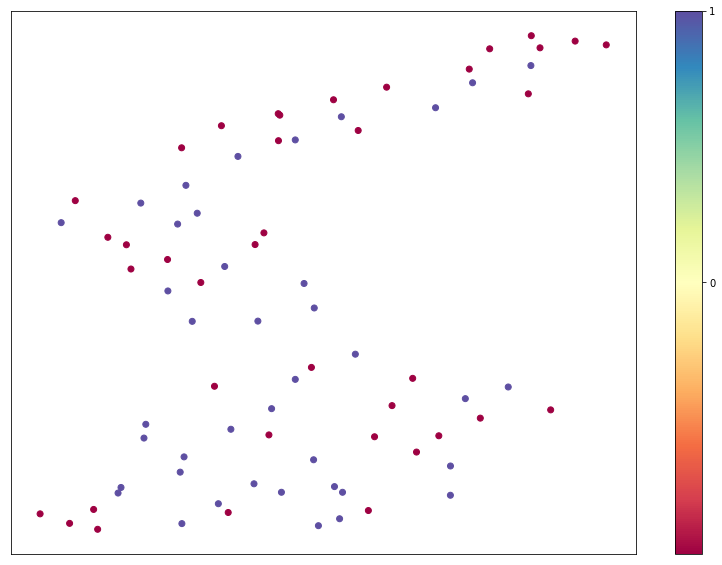

In [149]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T,  c=labels, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar()
cbar.set_ticks(np.arange(2))

In [150]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(X, y=labels);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=labels, cmap='Spectral')
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=labels, cmap='Spectral')
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=labels, s=100)
    plt.title(title, fontsize=18)

In [151]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

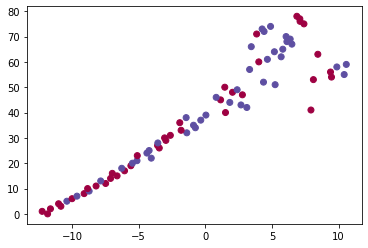

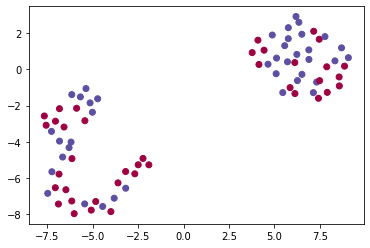

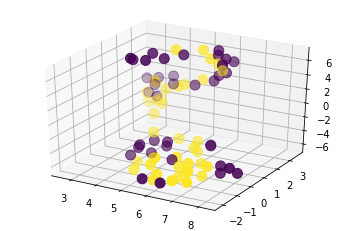

In [155]:
for n in (1, 2, 3):
    draw_umap(n_components=n, n_neighbors=4, min_dist=0.6,)

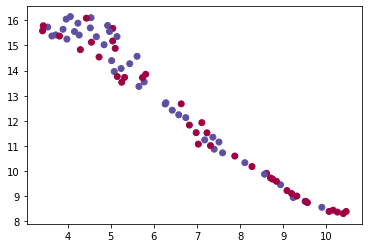

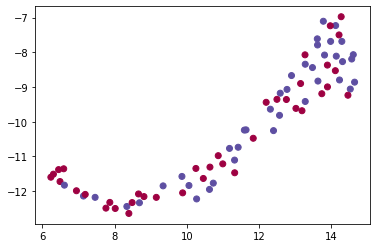

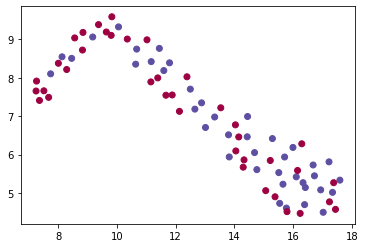

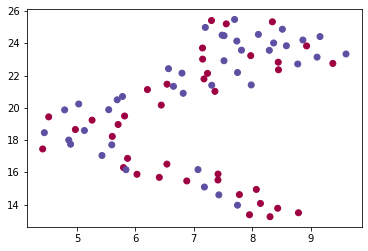

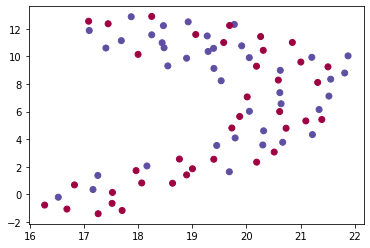

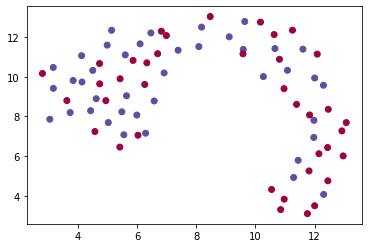

In [172]:
for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
    draw_umap(min_dist=d)

C:\Users\arian\anaconda\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 12 separate connected components using meta-embedding (experimental)
  n_components
C:\Users\arian\anaconda\lib\site-packages\umap\umap_.py:1383: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "
C:\Users\arian\anaconda\lib\site-packages\umap\umap_.py:1383: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


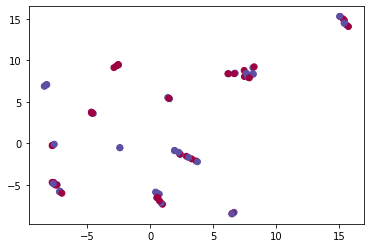

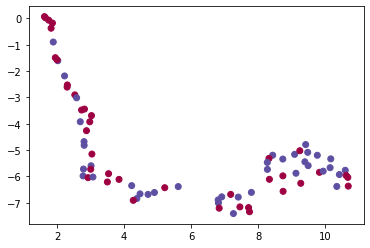

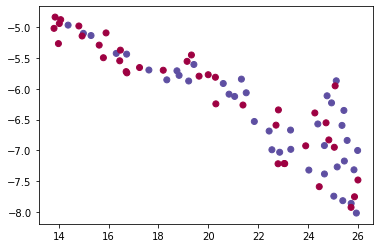

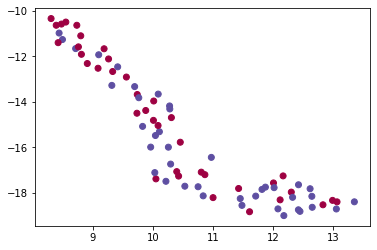

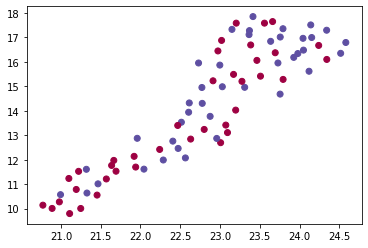

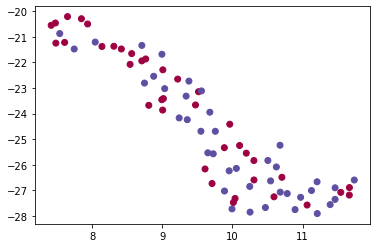

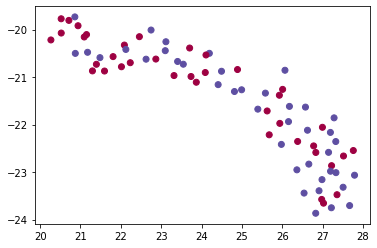

In [175]:
for n in (2, 5, 10, 20, 50, 100, 200):
    draw_umap(n_components=2, n_neighbors=n)